In [1]:
import csv
import pandas as pd
from docx import Document
import matplotlib as plt

# reads data and makes it able to be put in word document
with open ('data/data.csv', 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    data = [line for line in csv_reader]

#load data from csv file to terminal
data = pd.read_csv('data/data.csv')

#Makes the date sure to be a date and not a string
data["date"] = pd.to_datetime(data["date"])

#drop data from row
data_prediction = data.loc[:, ['Prediccion']]
data_actual = data.loc[:, ['TotDThickFlow']]

#true label
data["TomTotDThickFlow"] = data["TotDThickFlow"].shift(-1)

#the difference
data["difference"] = data["TomTotDThickFlow"] - data["Prediccion"]



#print data to terminal
print(data_prediction, data_actual, data['difference'])

     Prediccion
0       67.8839
1       61.5077
2       90.7687
3       95.4107
4       96.2754
..          ...
337    132.7193
338    101.8732
339     70.9447
340    123.2367
341    145.9378

[342 rows x 1 columns]      TotDThickFlow
0         0.682750
1         0.468267
2        57.614833
3        96.063083
4        81.866850
..             ...
337     152.761200
338     132.952417
339      95.102650
340      45.661917
341      77.119917

[342 rows x 1 columns] 0     -67.415633
1      -3.892867
2       5.294383
3     -13.543850
4      -6.441833
         ...    
337     0.233117
338    -6.770550
339   -25.282783
340   -46.116783
341          NaN
Name: difference, Length: 342, dtype: float64


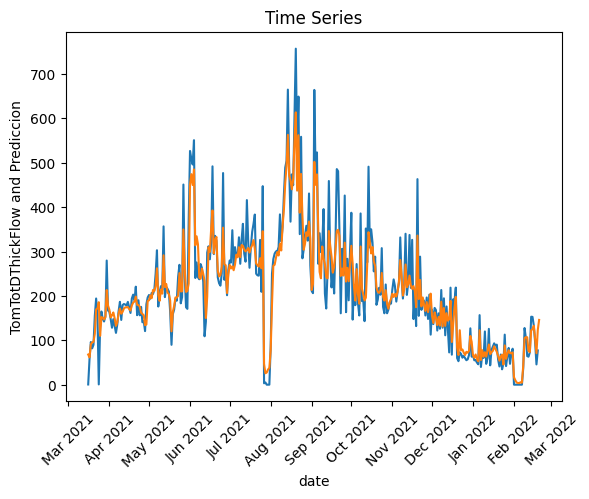

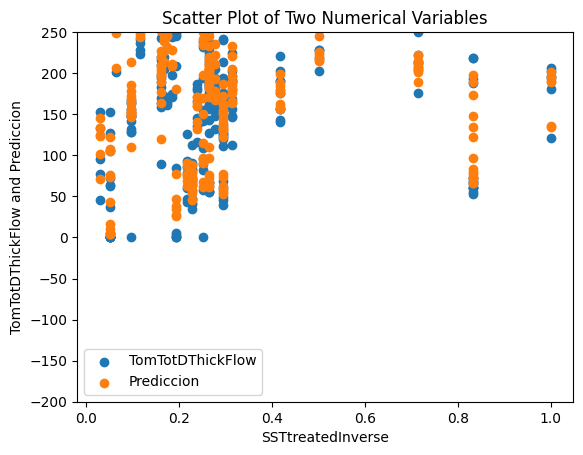

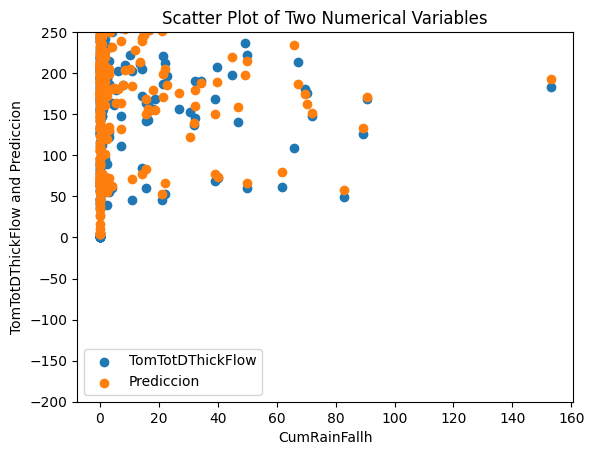

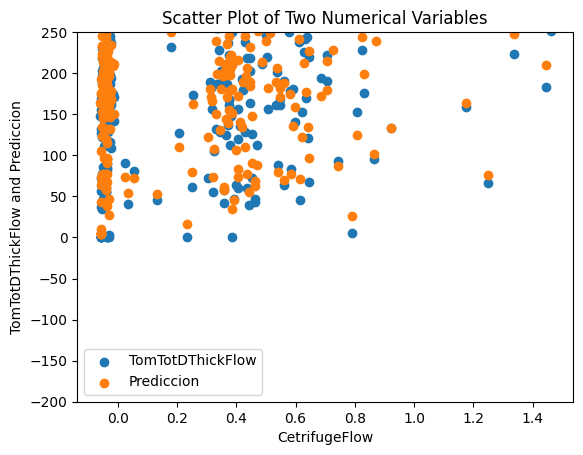

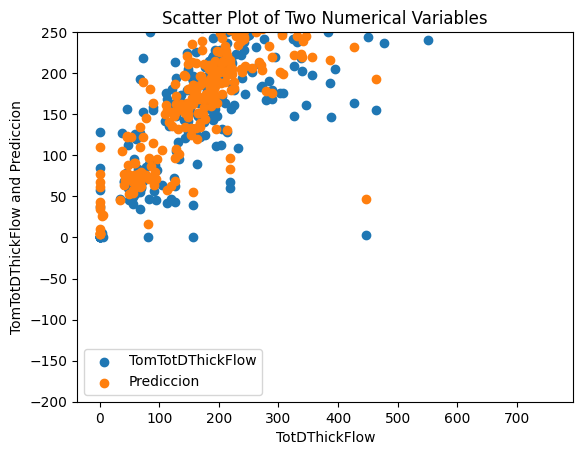

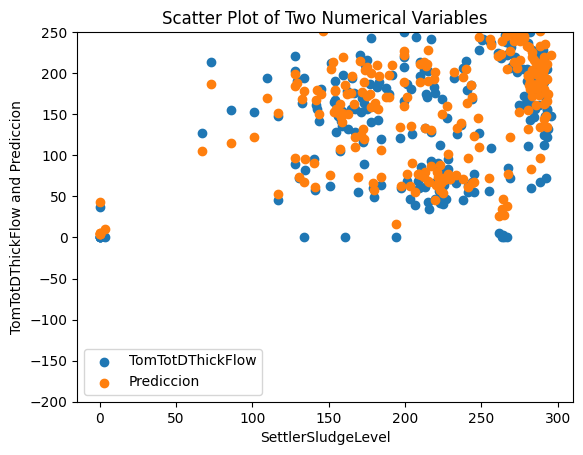

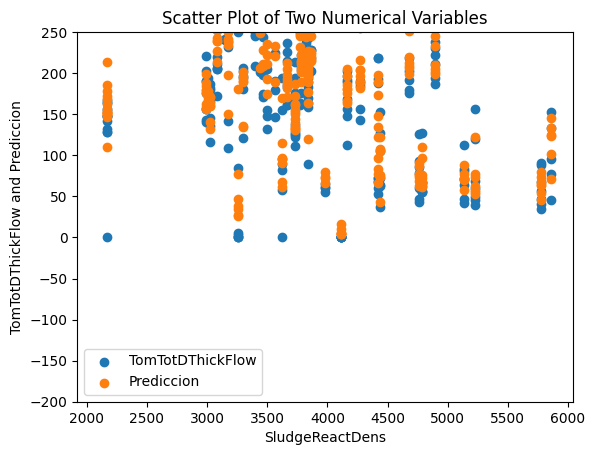

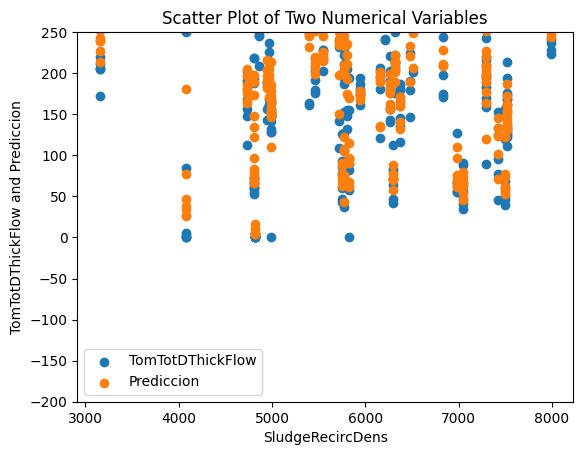

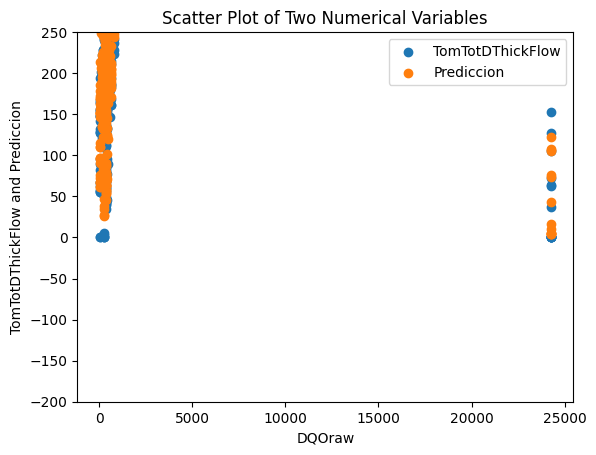

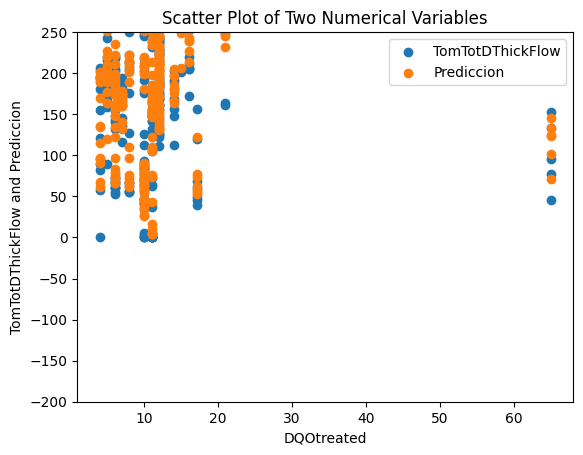

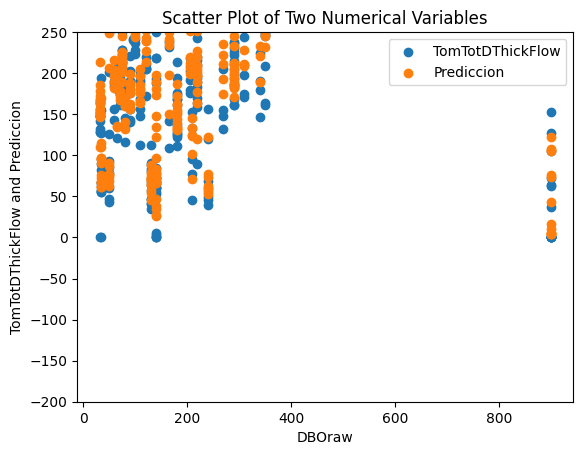

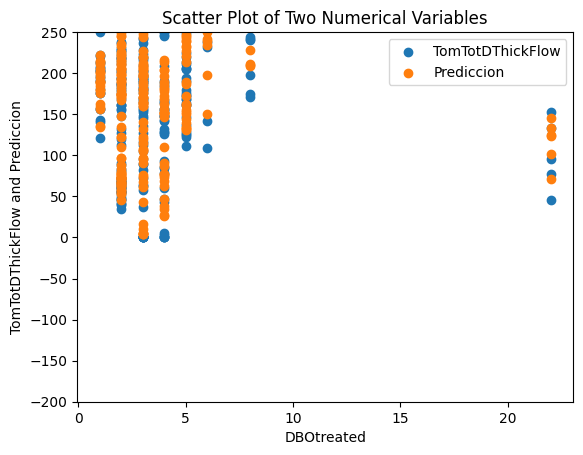

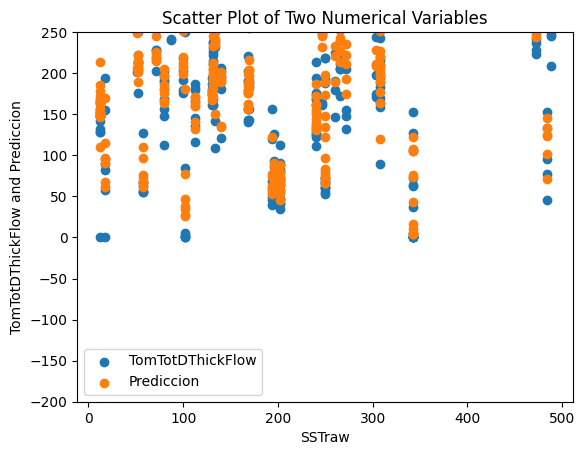

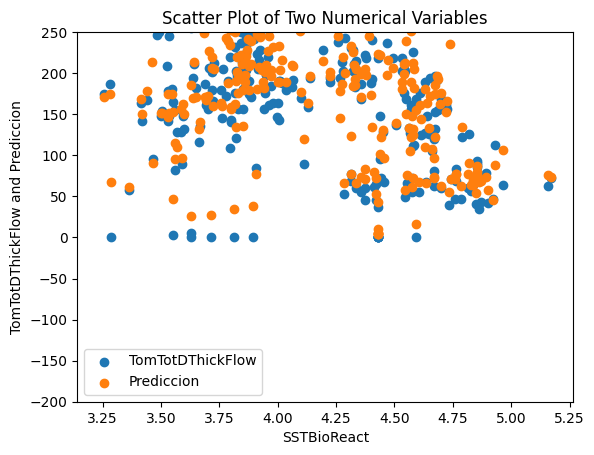

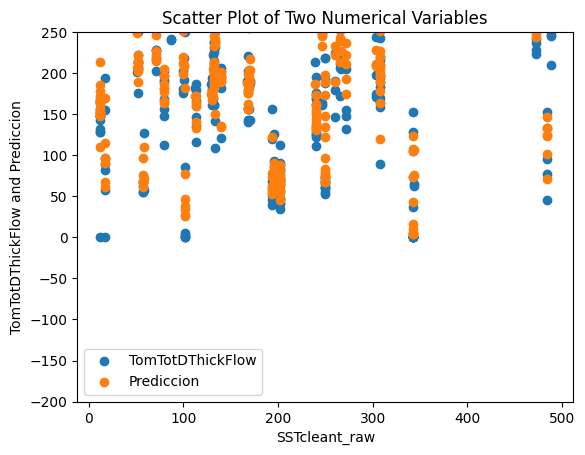

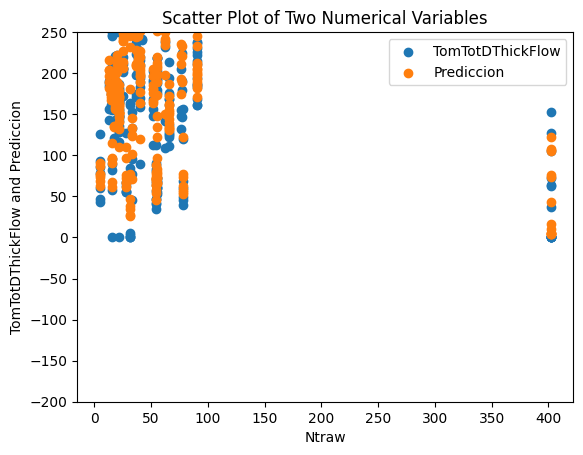

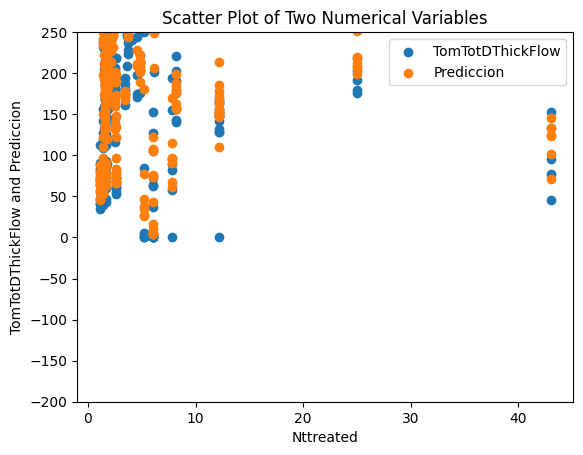

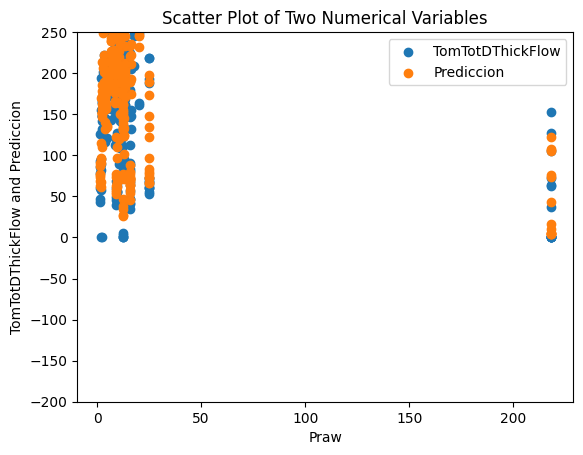

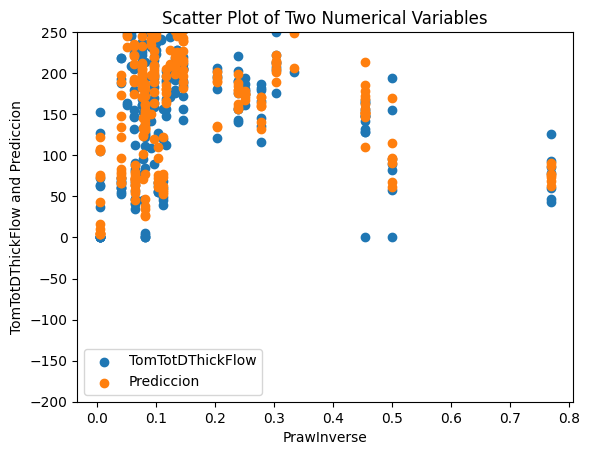

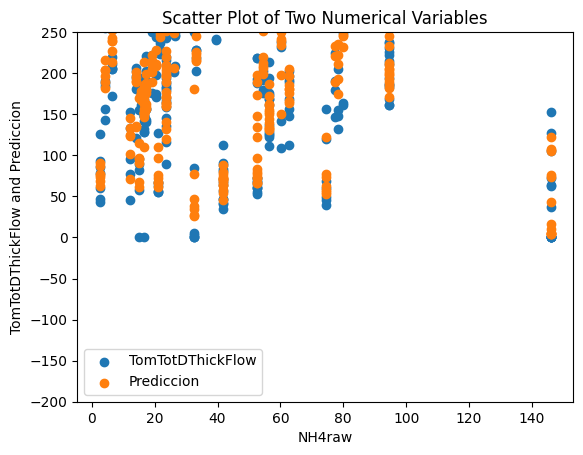

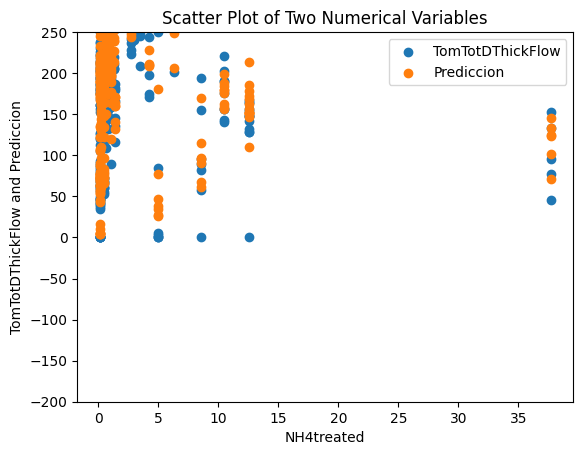

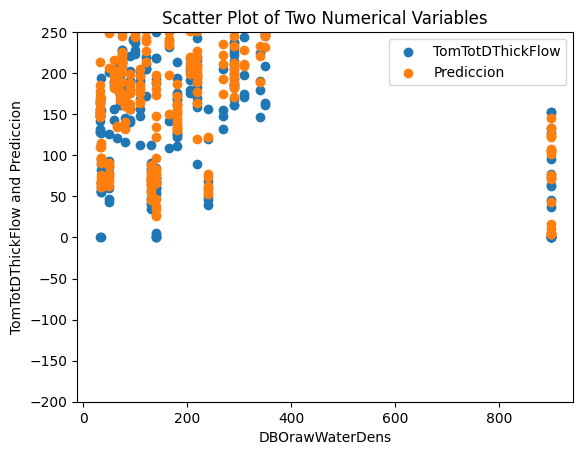

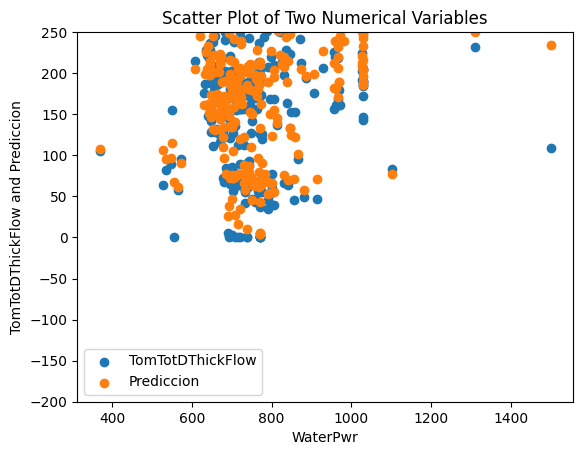

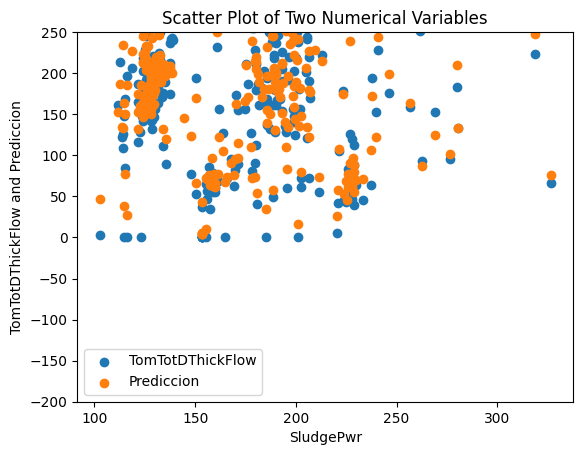

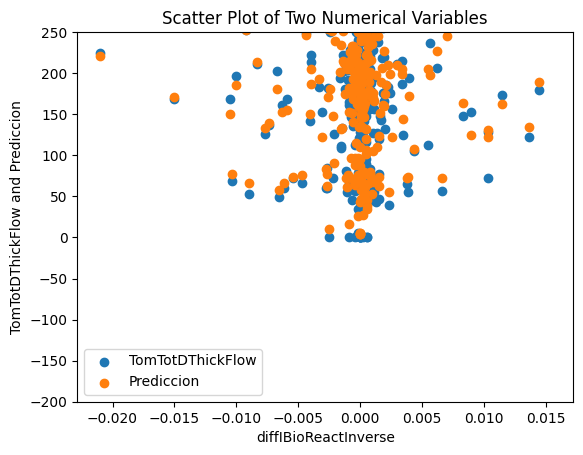

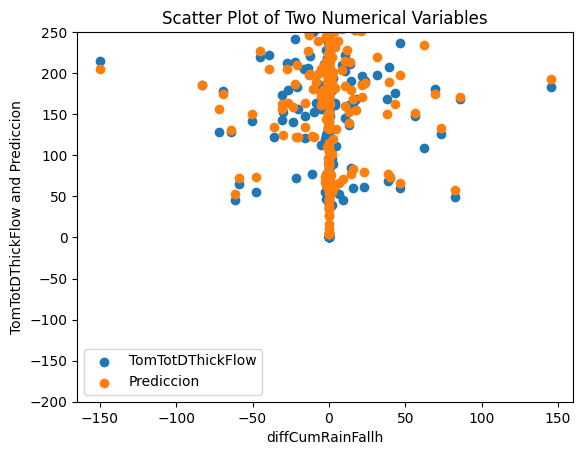

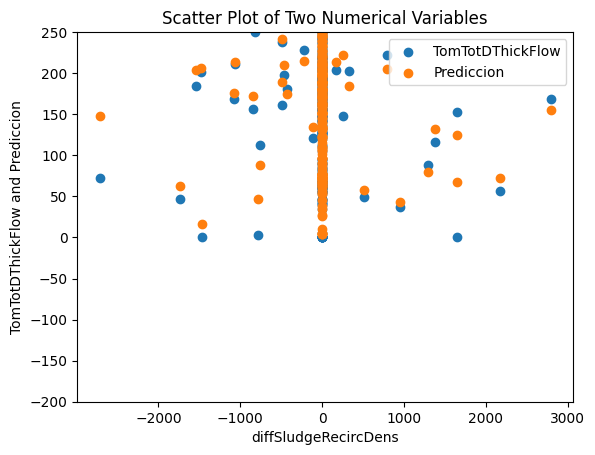

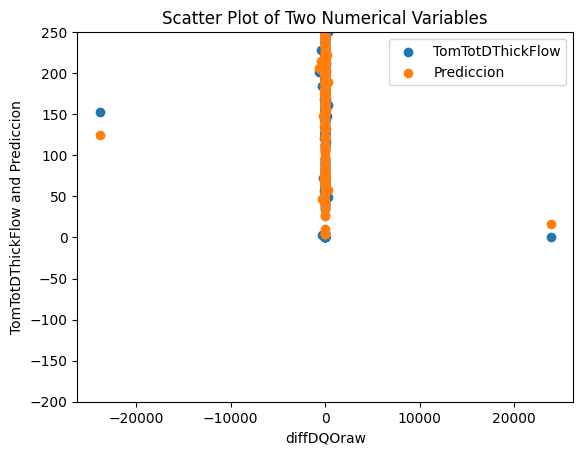

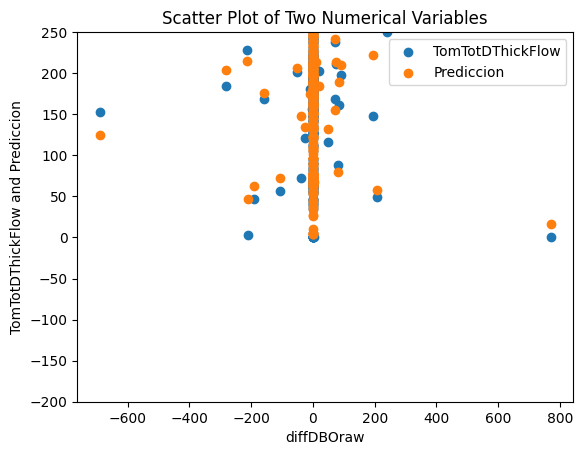

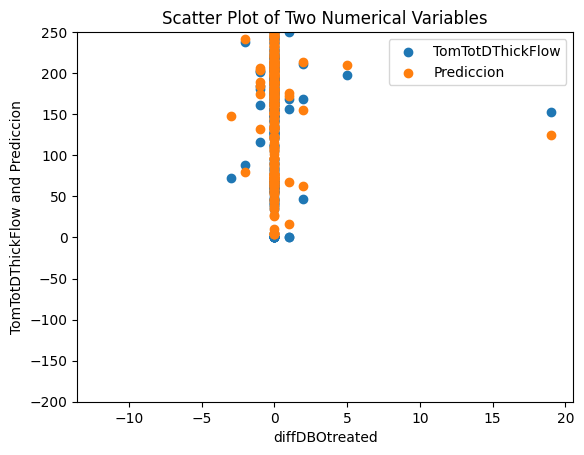

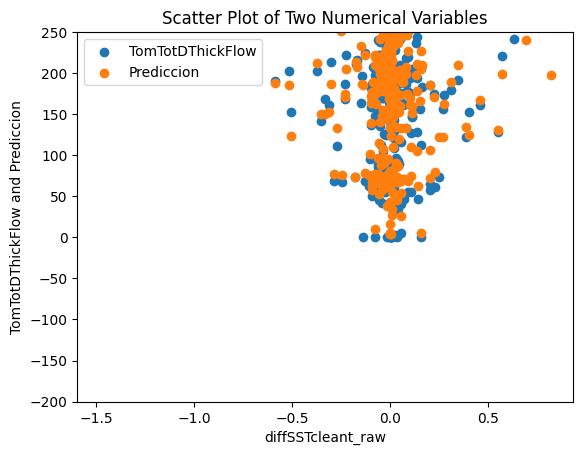

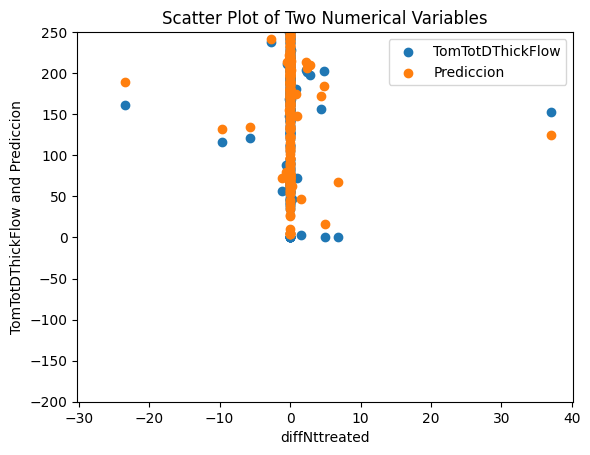

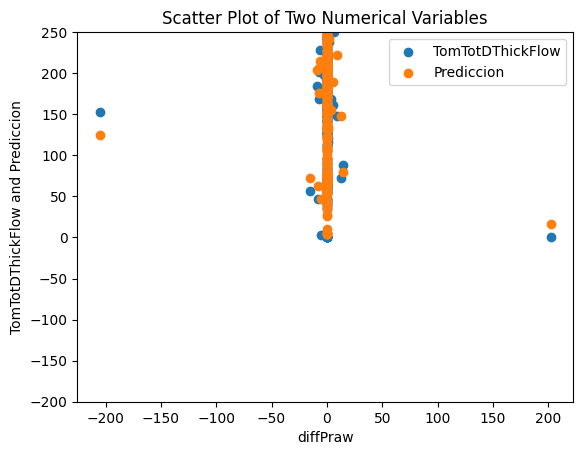

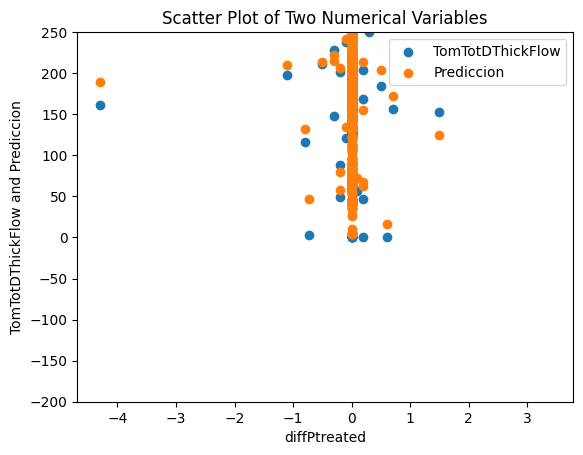

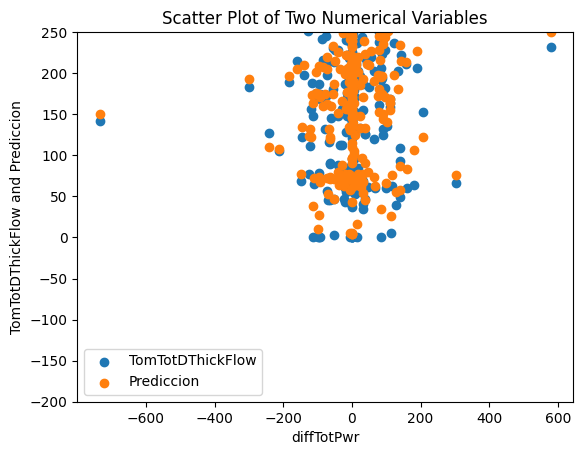

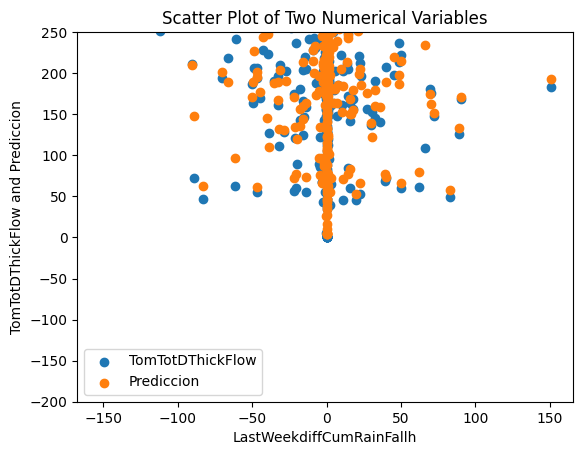

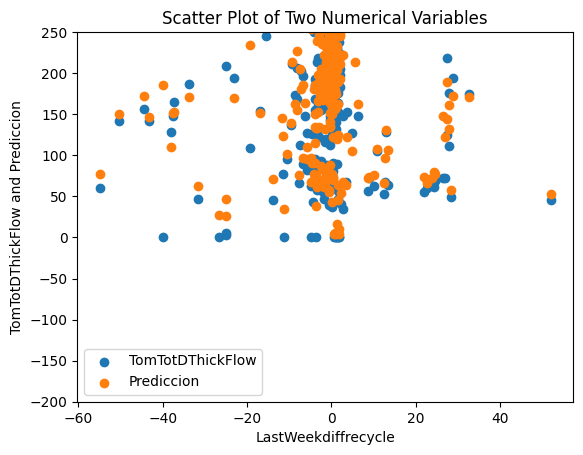

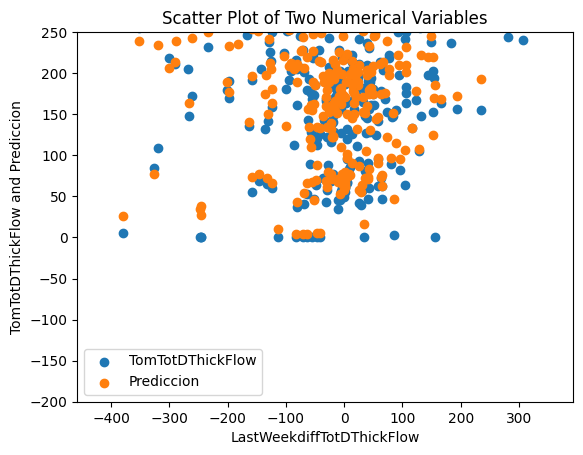

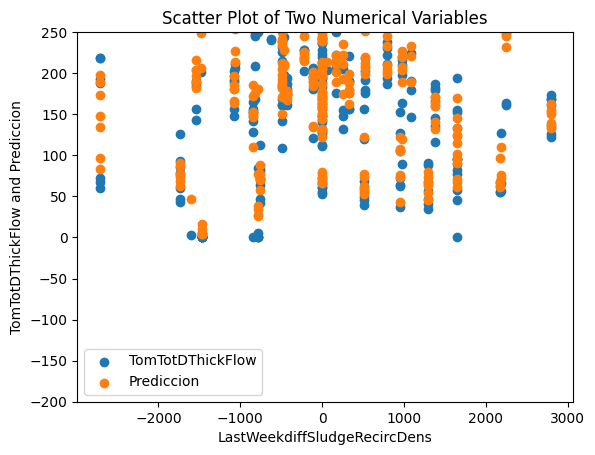

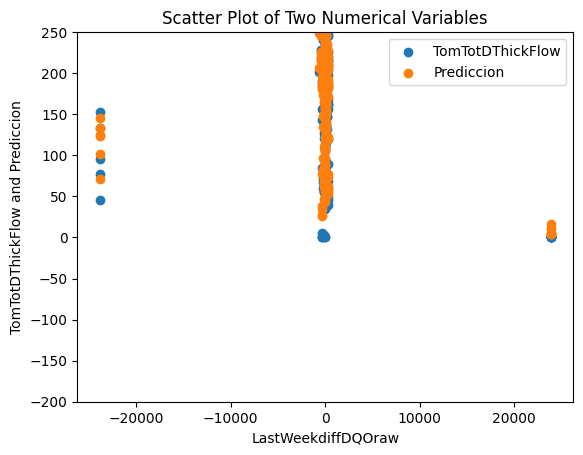

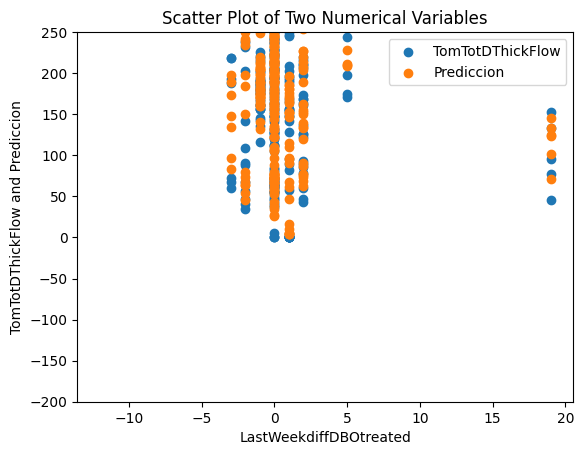

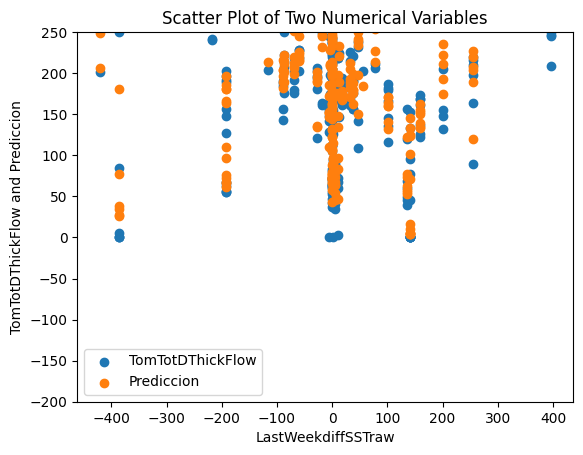

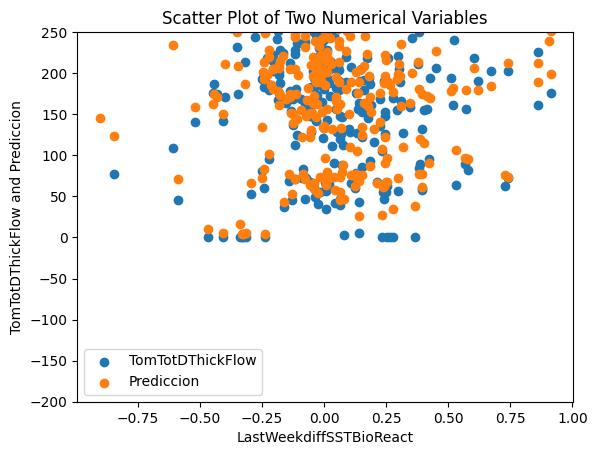

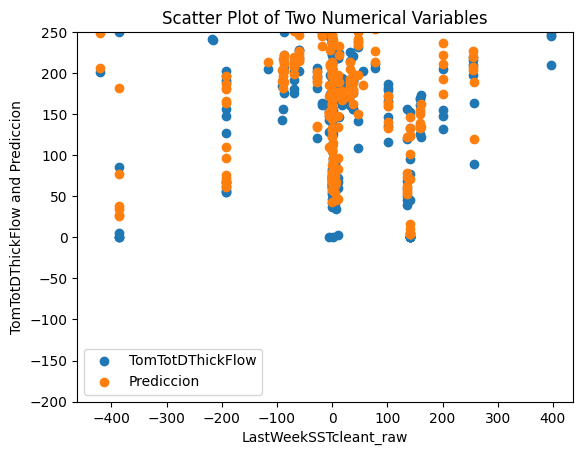

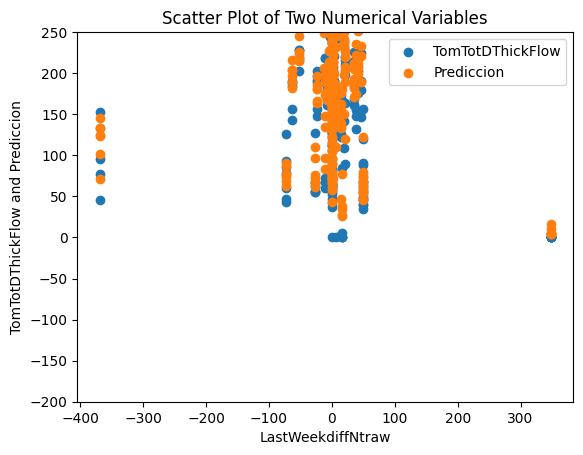

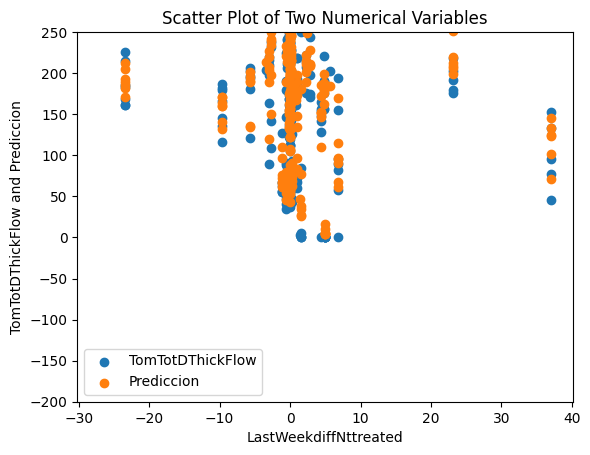

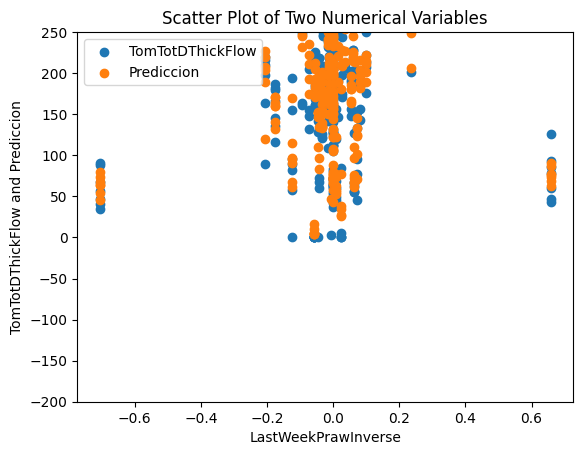

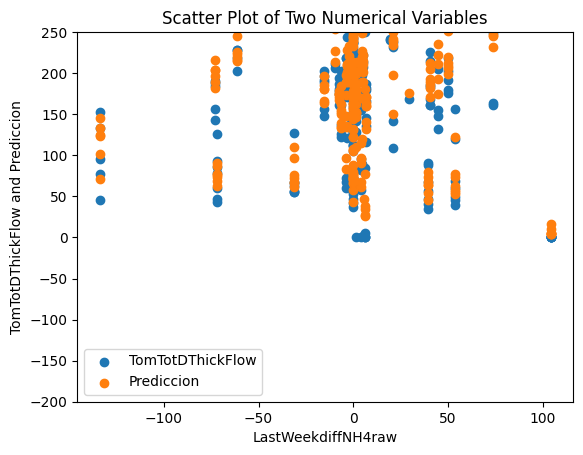

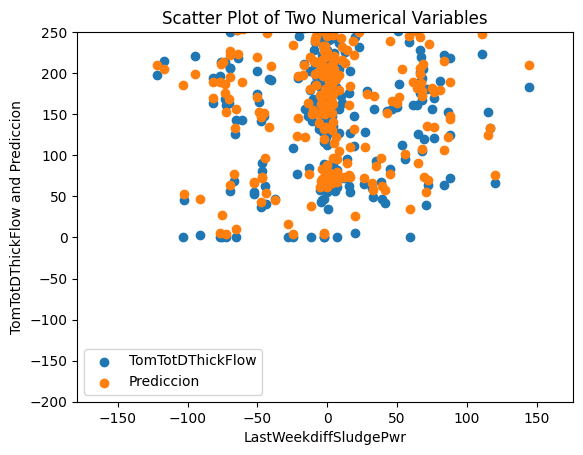

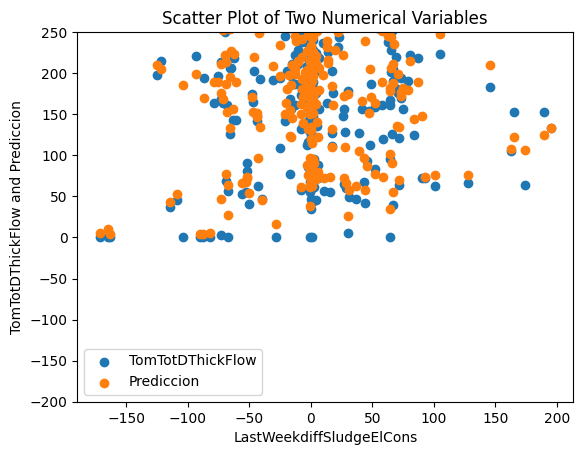

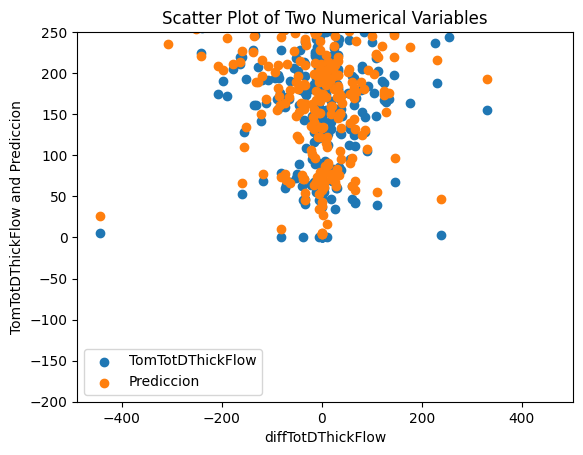

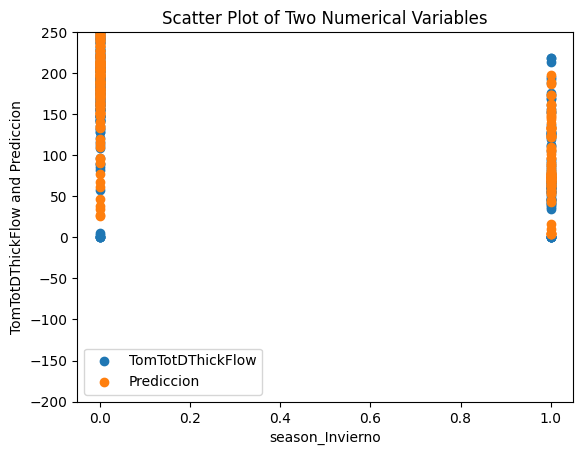

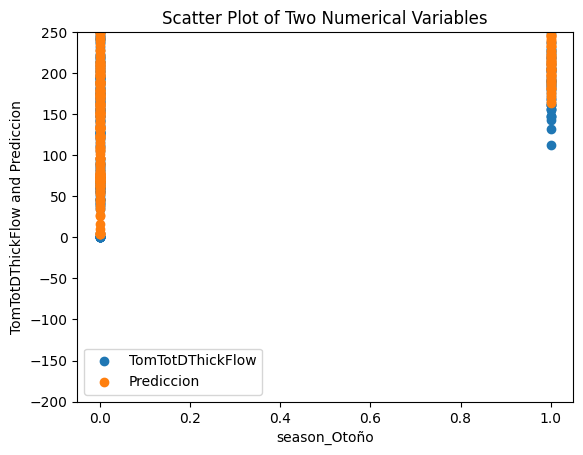

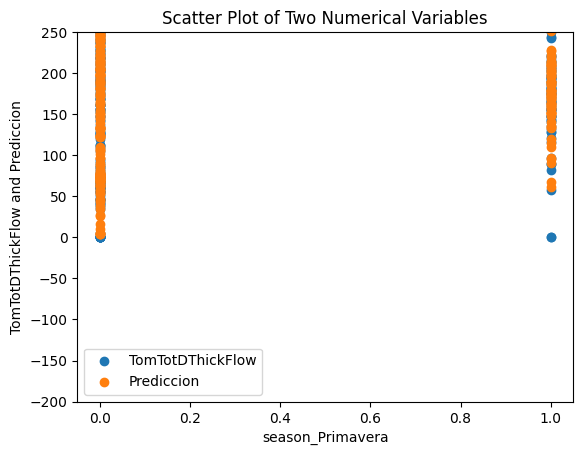

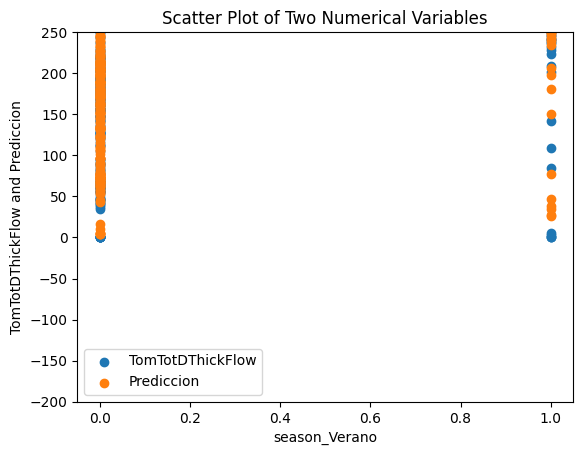

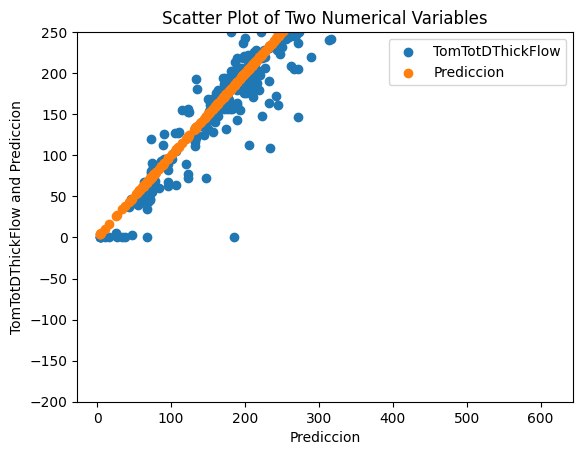

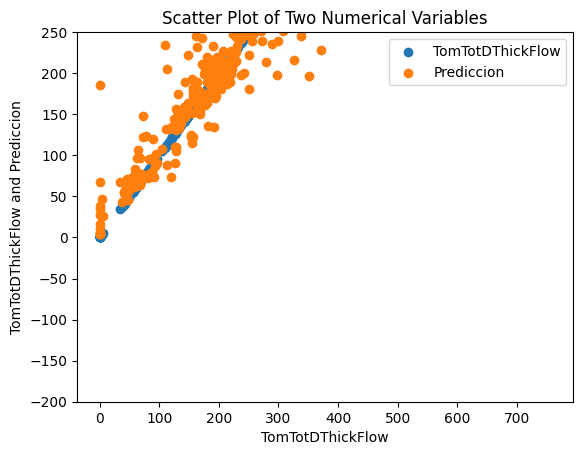

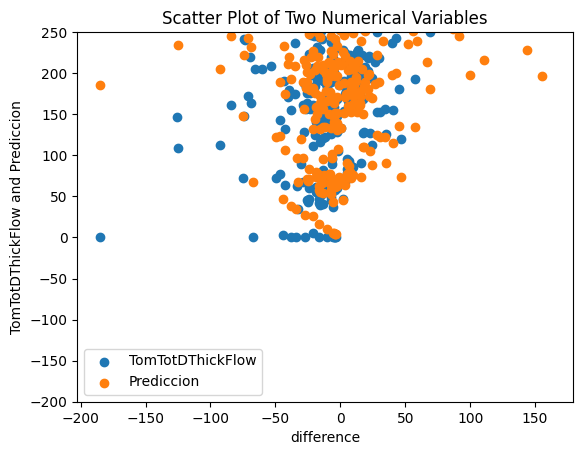

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Sample data
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

#creating the plot/graphs
for variable in data.columns:
    if variable != "date":
        plt.scatter(data[variable], data["TomTotDThickFlow"], label='TomTotDThickFlow')
        plt.scatter(data[variable], data["Prediccion"], label='Prediccion')
        plt.title('Scatter Plot of Two Numerical Variables')
        plt.xlabel(variable)
        plt.ylabel('TomTotDThickFlow and Prediccion')
        plt.legend()
        #setting limit for y /range
        plt.ylim(bottom = -200, top = 250)
        plt.show()
    else: 
        plt.plot(data[variable], data["TomTotDThickFlow"], label='TomTotDThickFlow')
        plt.plot(data[variable], data["Prediccion"], label='Prediccion')
        plt.title('Time Series')
        plt.xlabel(variable)
        plt.ylabel('TomTotDThickFlow and Prediccion')
        # Get the current axis
        ax = plt.gca()
        # Set the major locator and formatter for the x-axis (assuming the variable is a date)
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
        plt.xticks(rotation=45)
        plt.show()

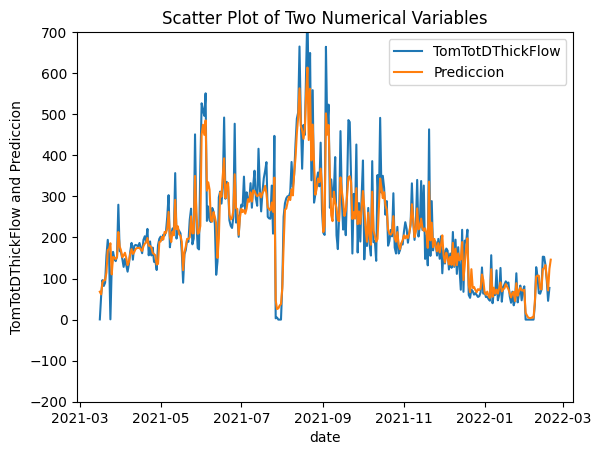

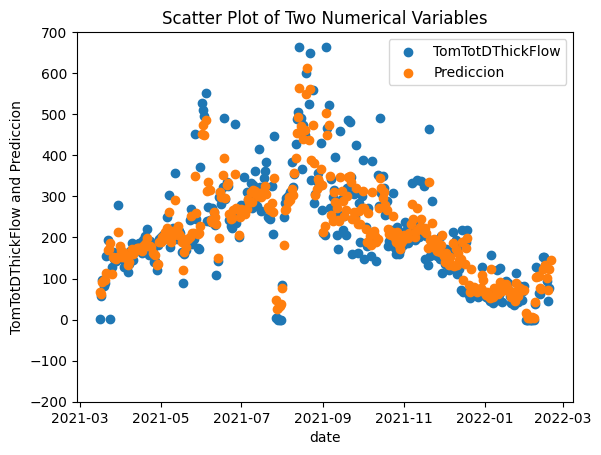

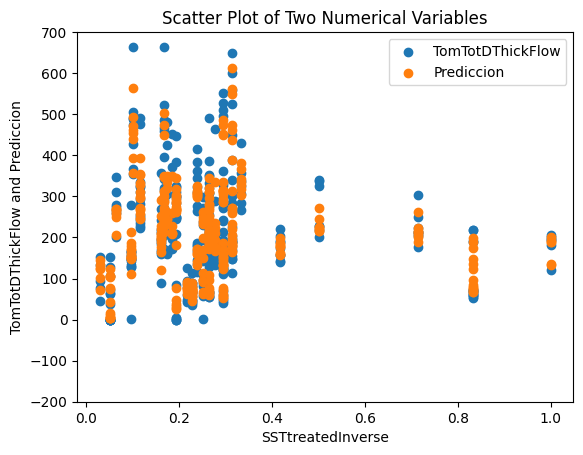

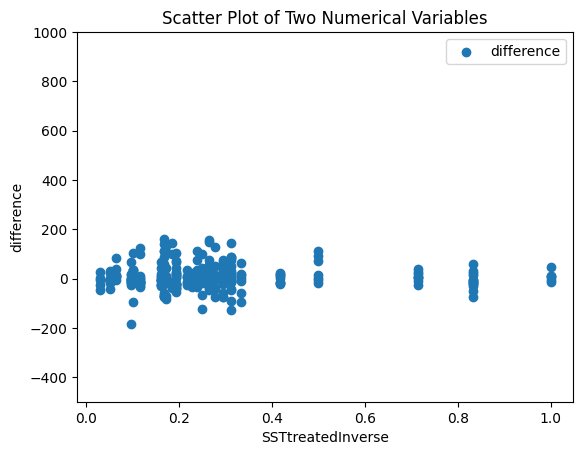

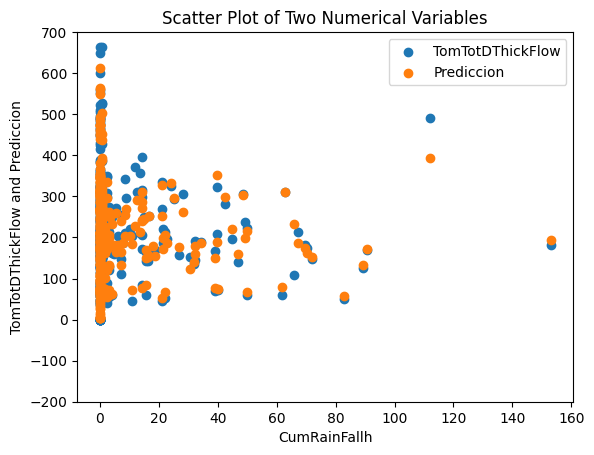

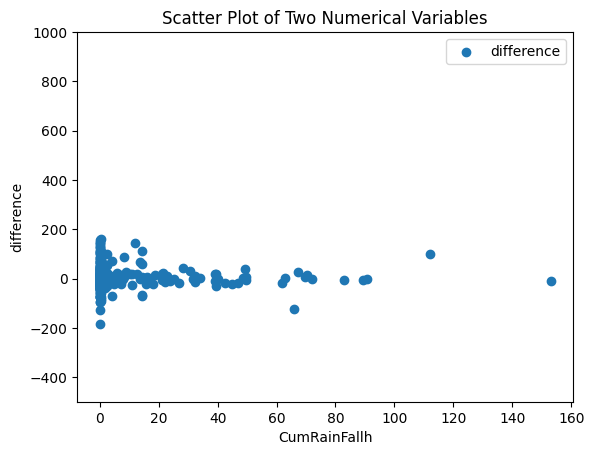

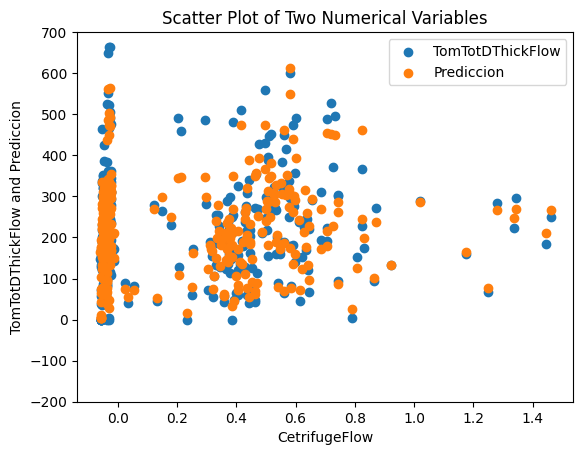

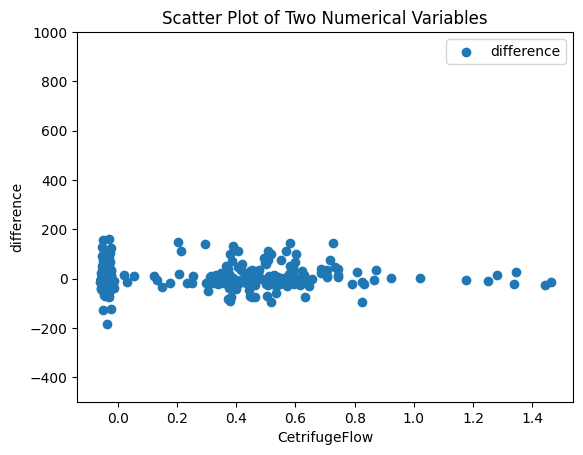

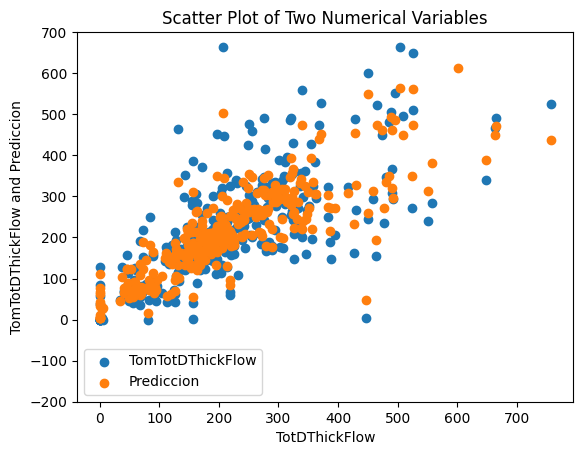

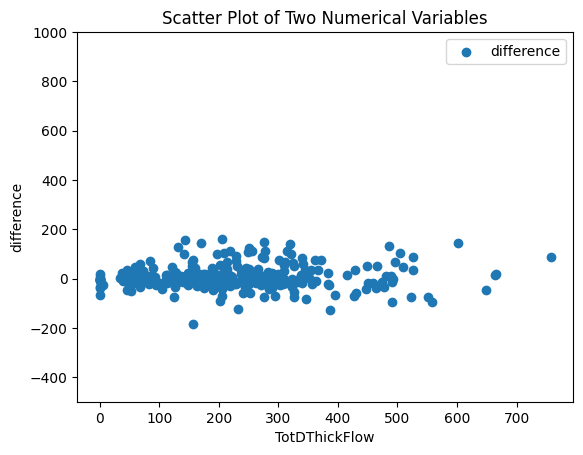

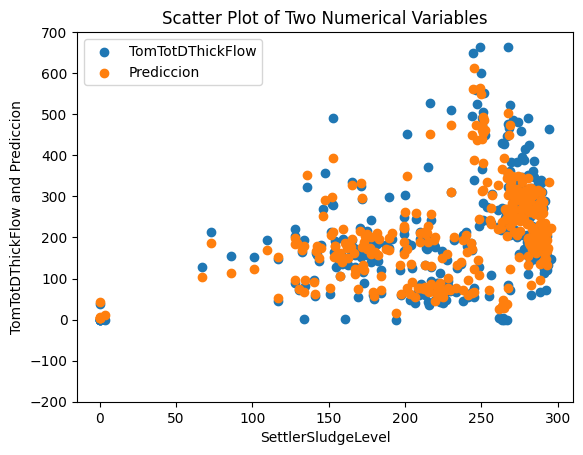

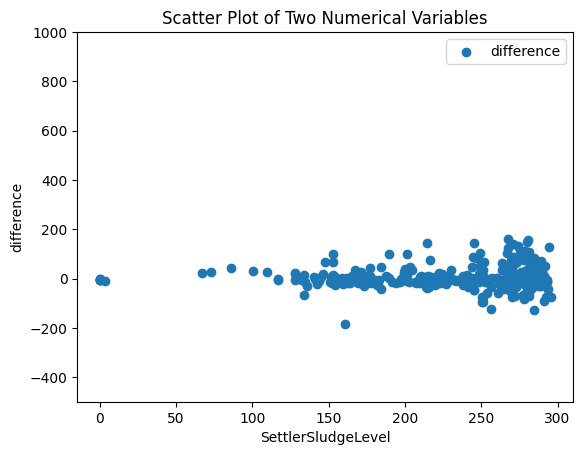

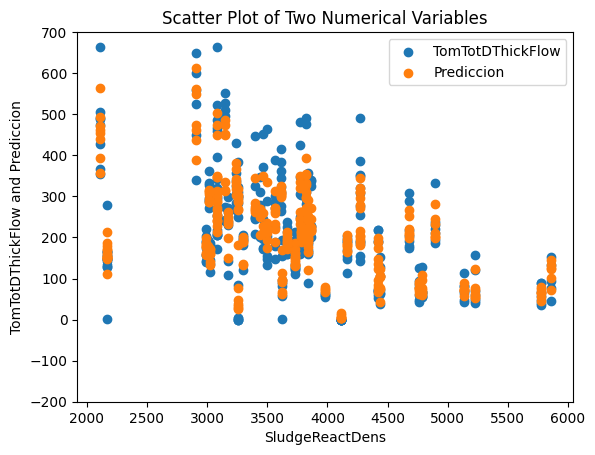

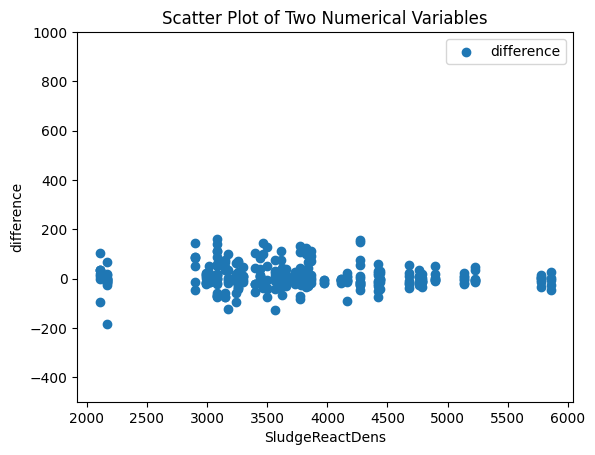

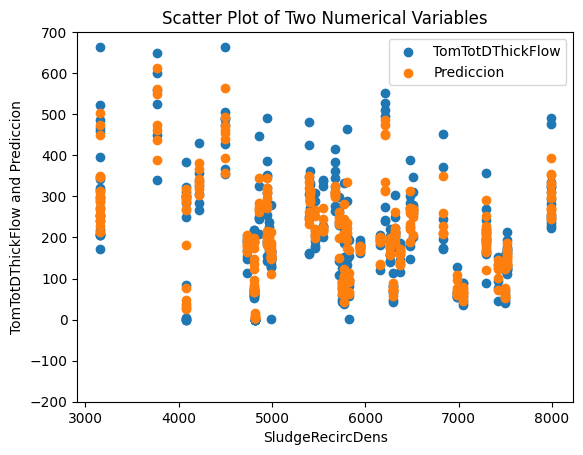

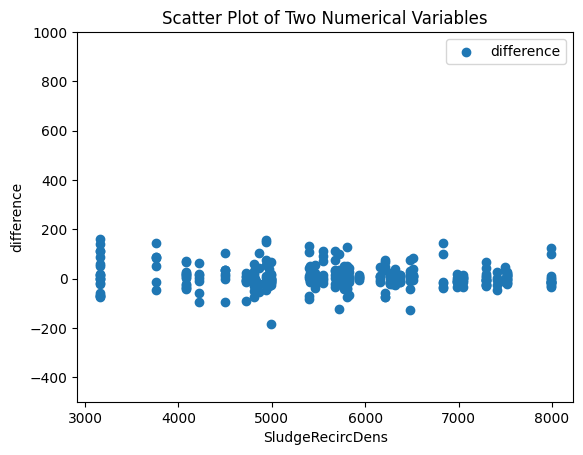

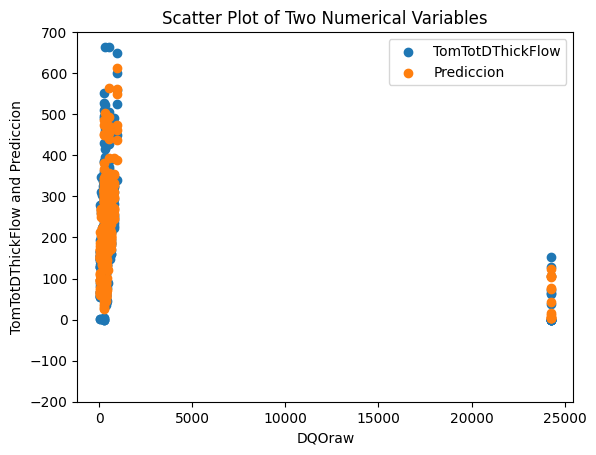

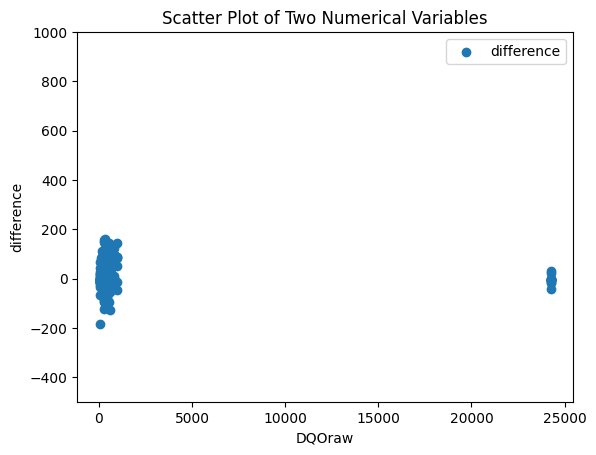

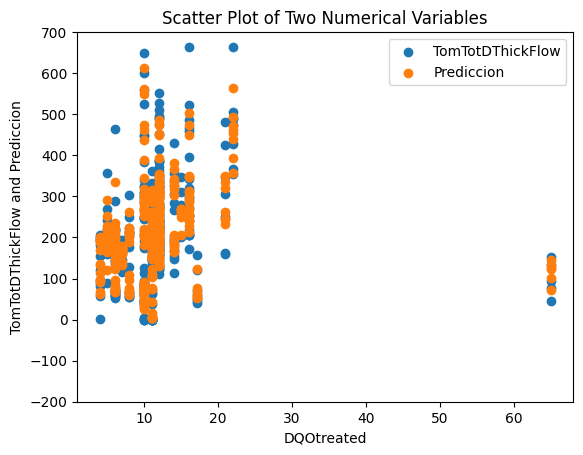

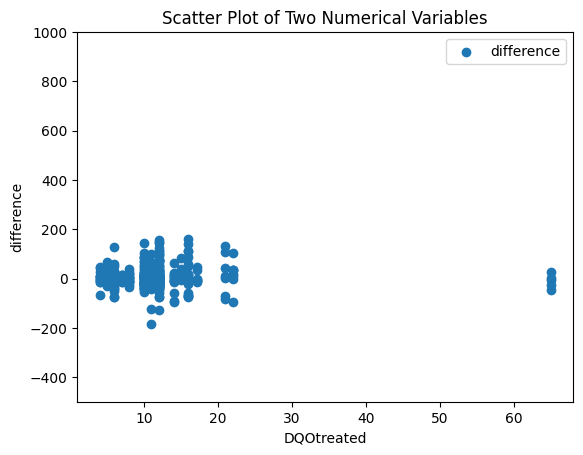

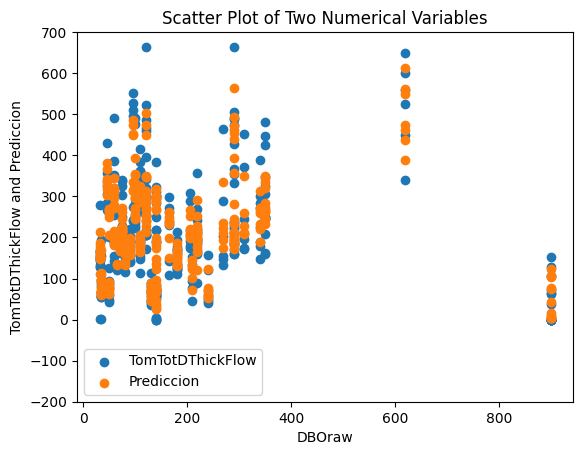

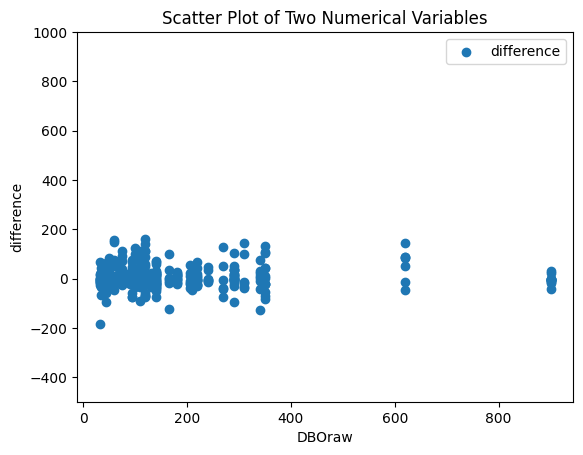

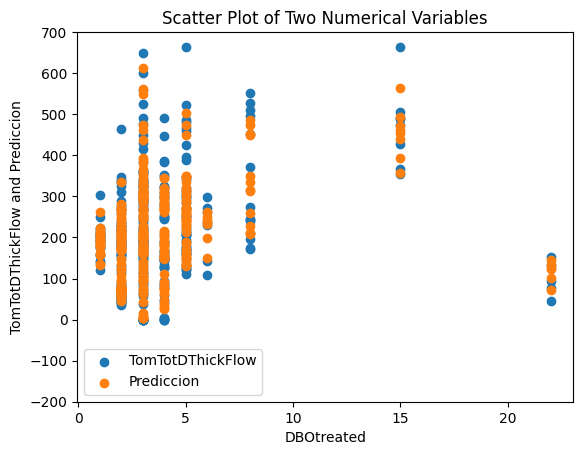

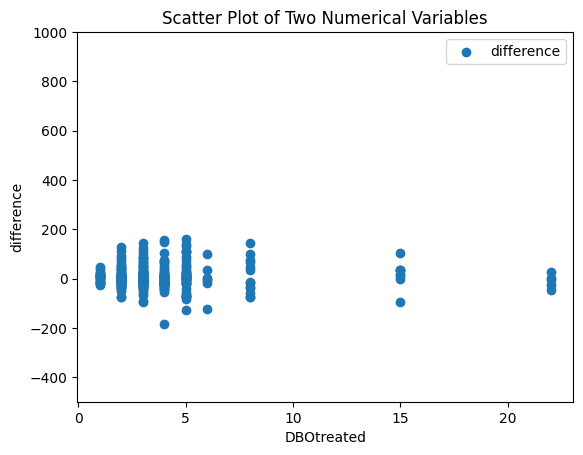

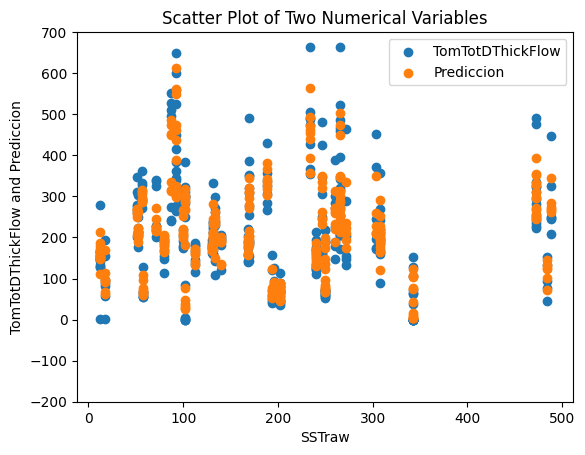

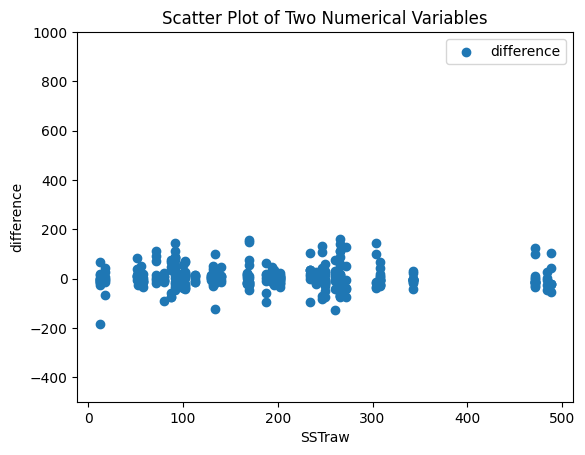

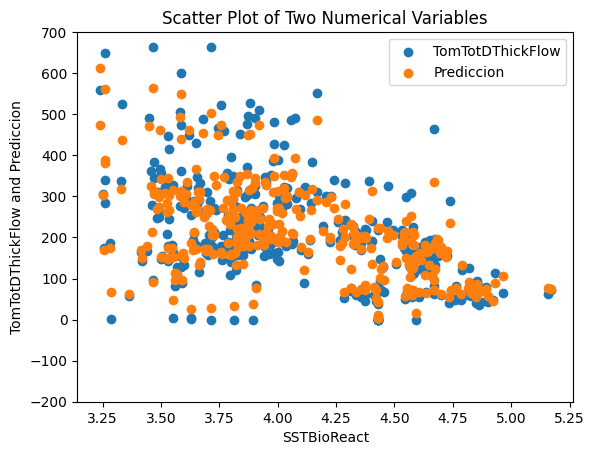

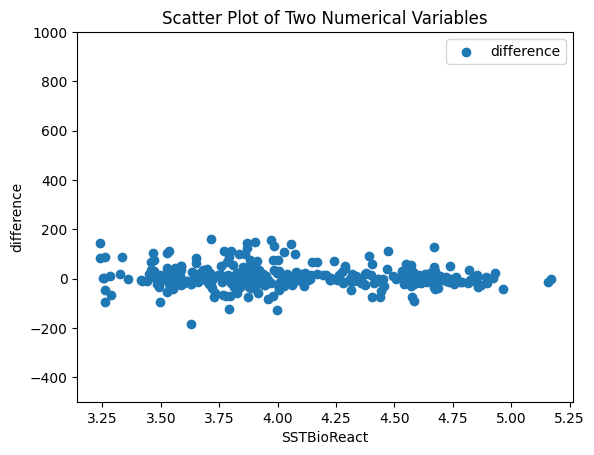

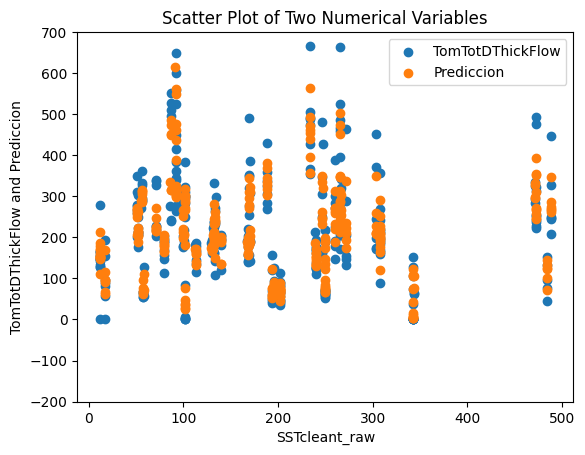

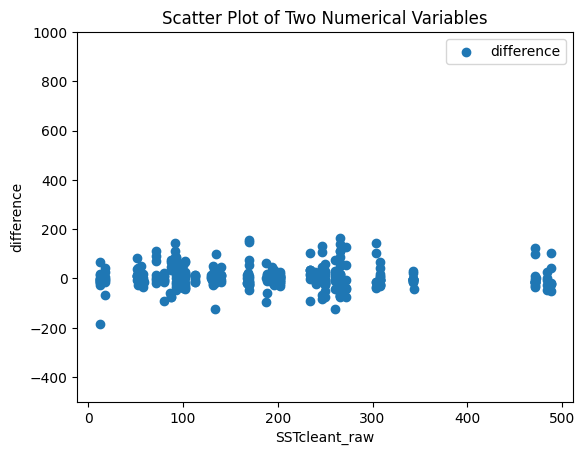

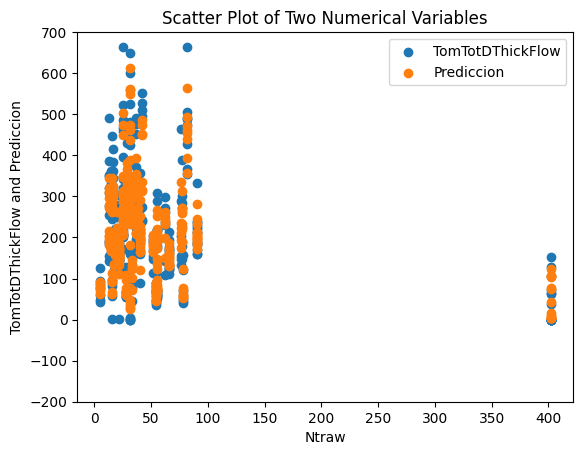

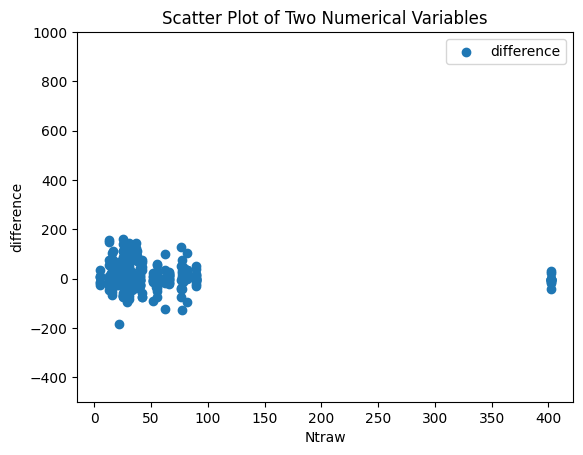

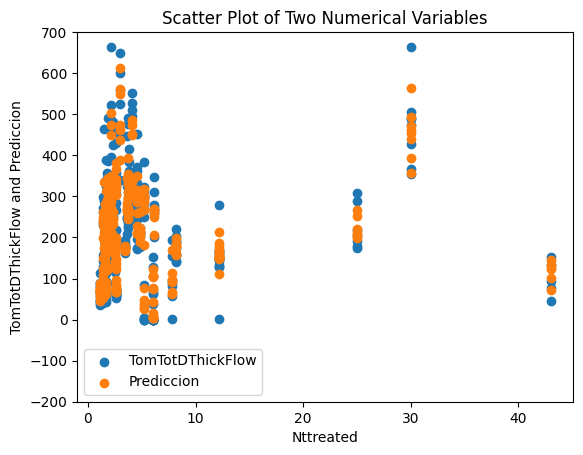

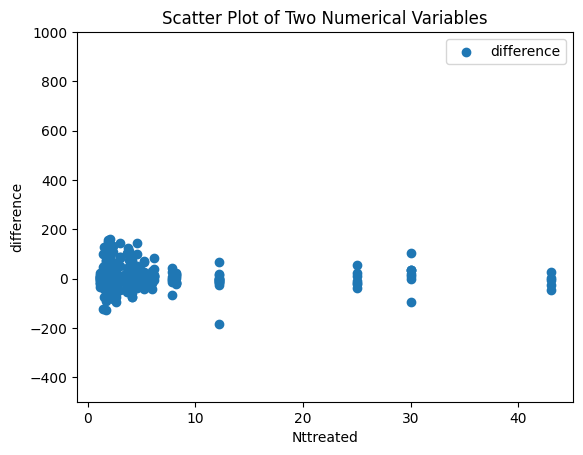

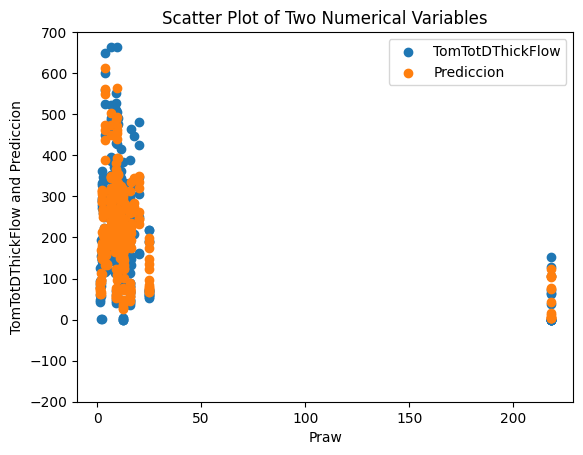

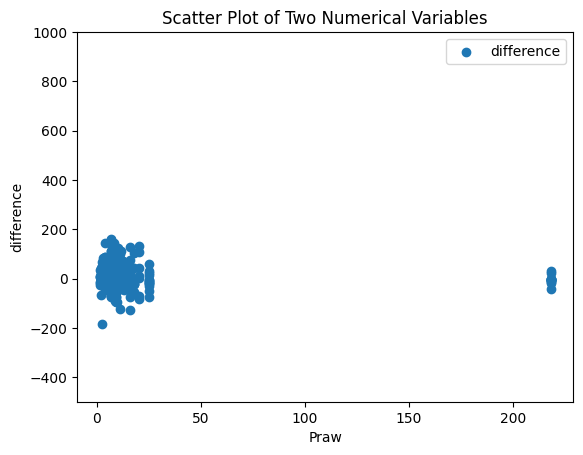

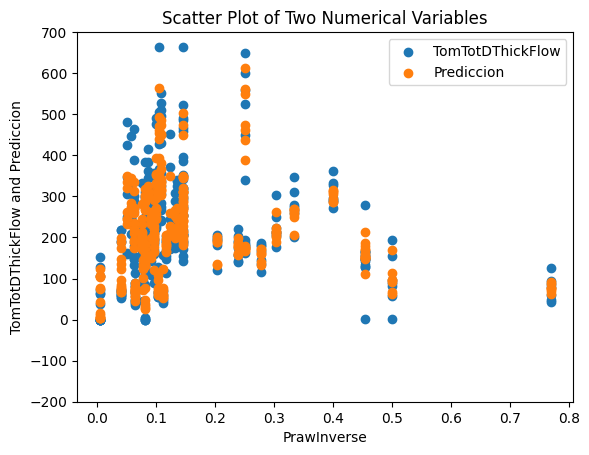

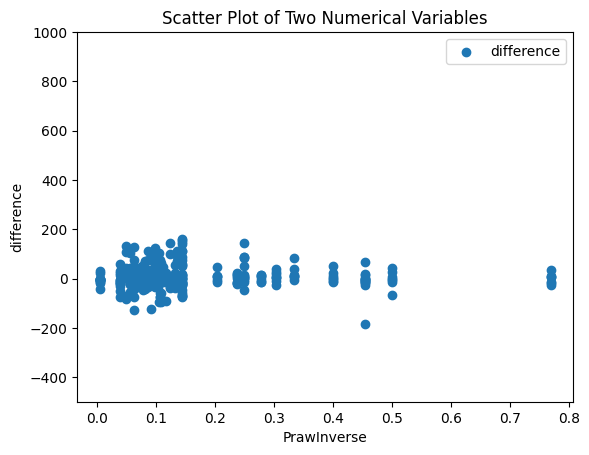

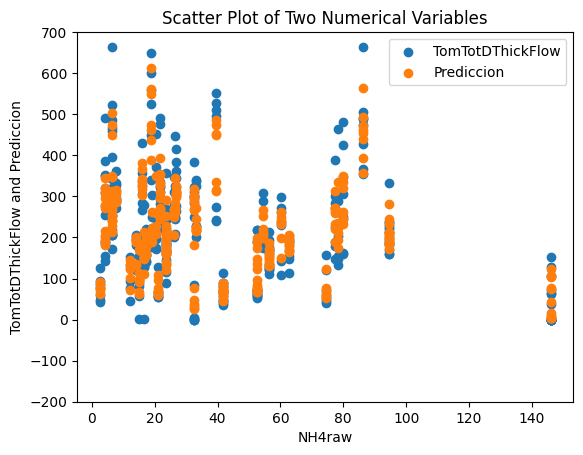

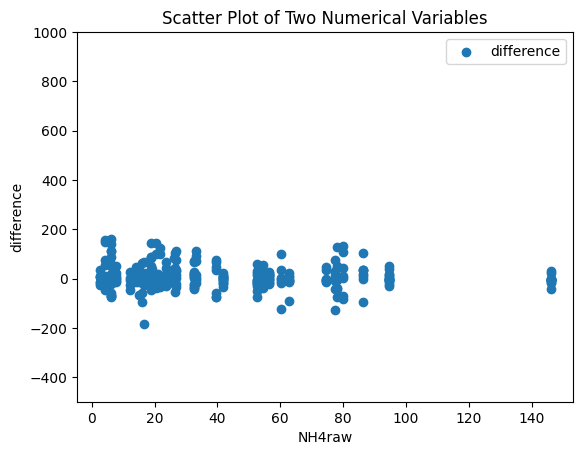

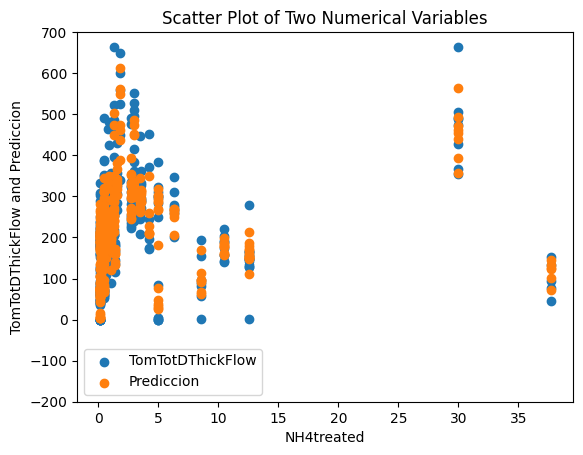

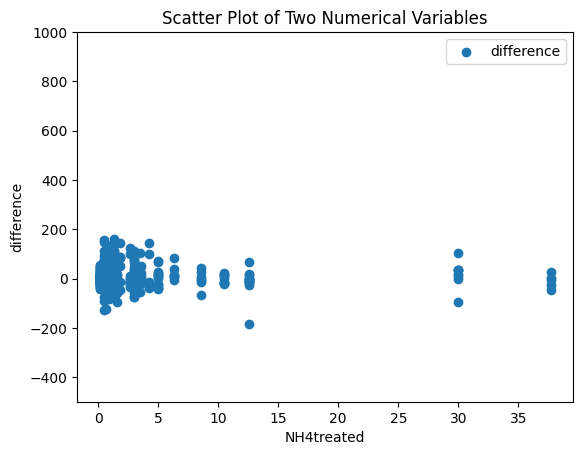

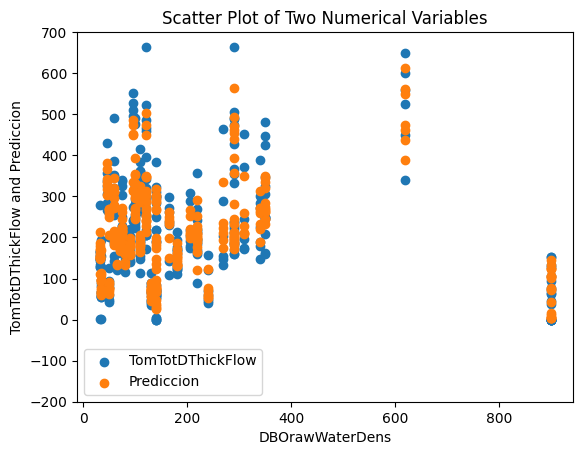

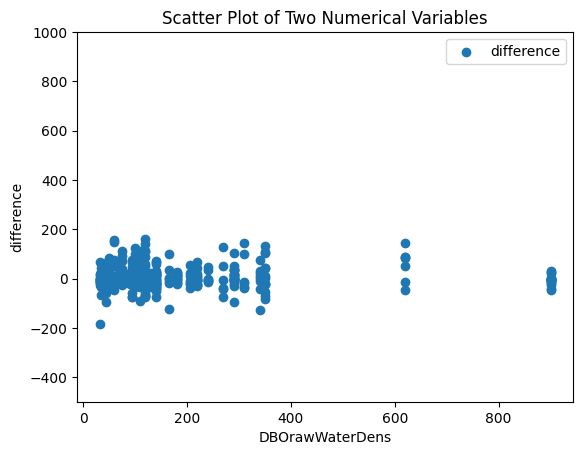

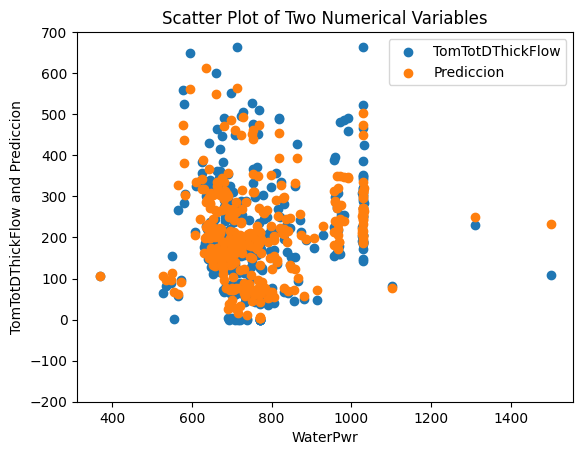

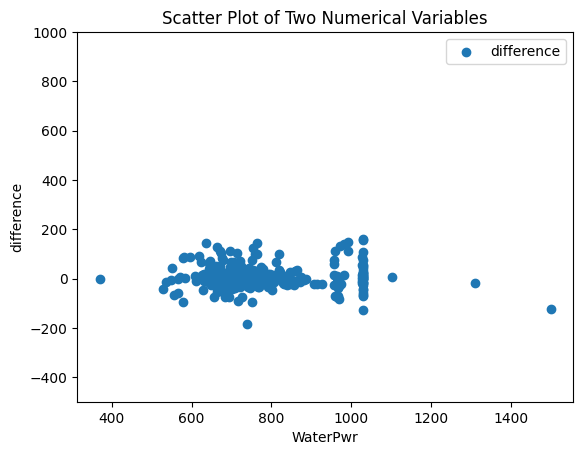

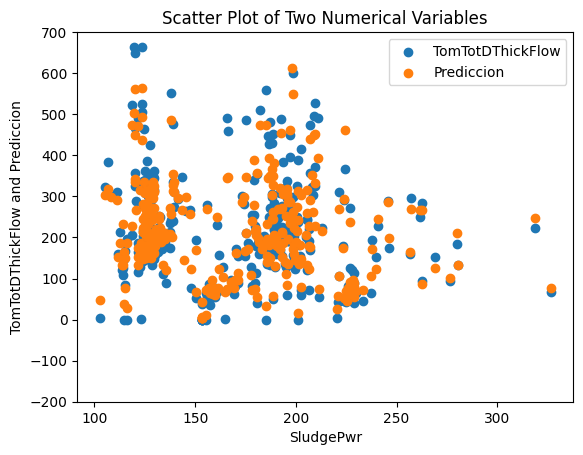

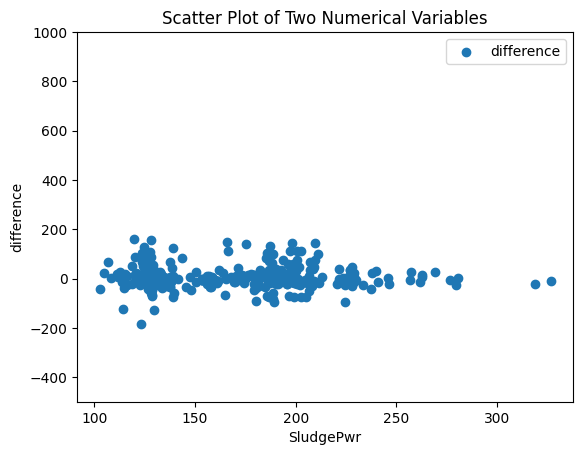

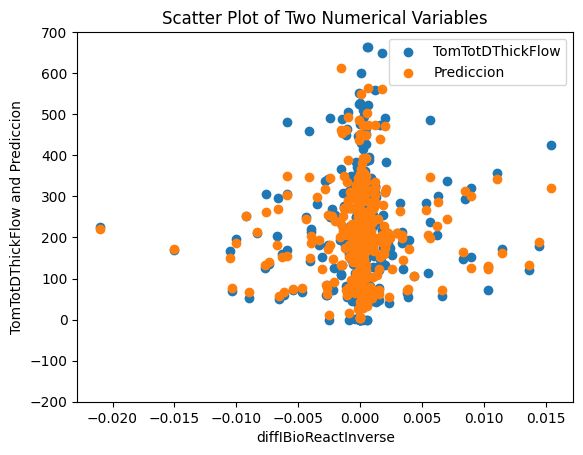

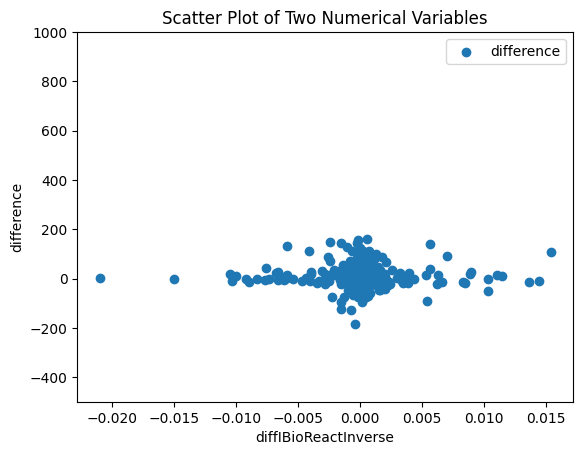

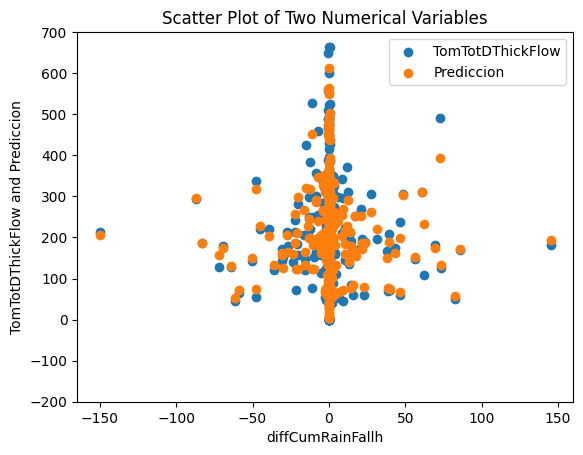

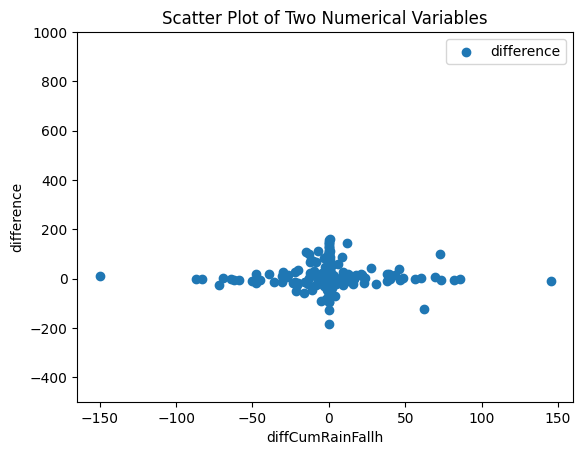

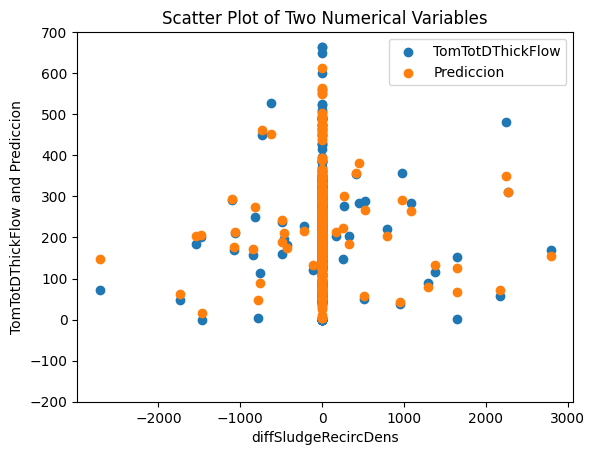

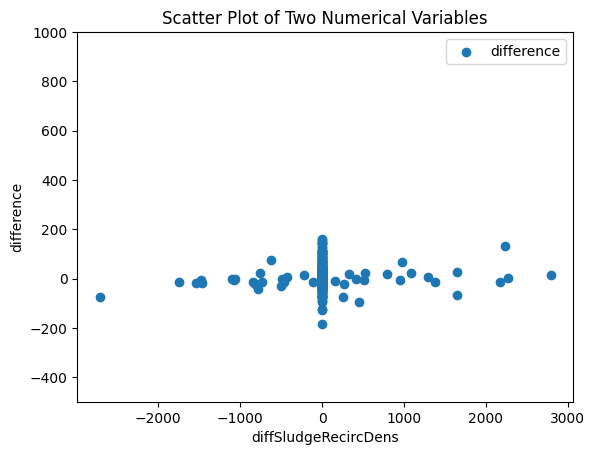

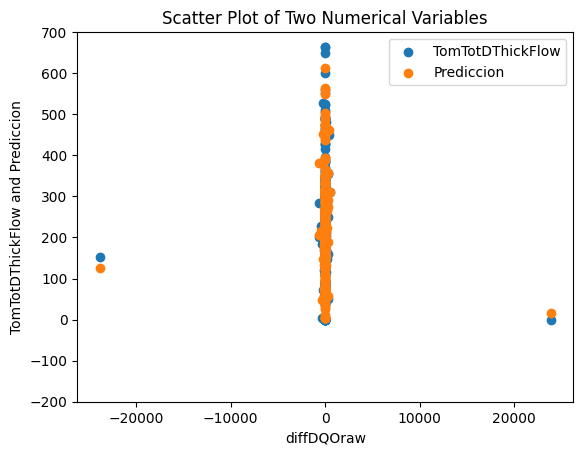

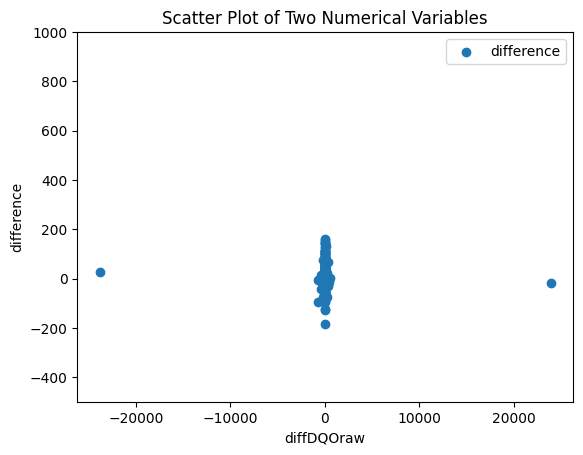

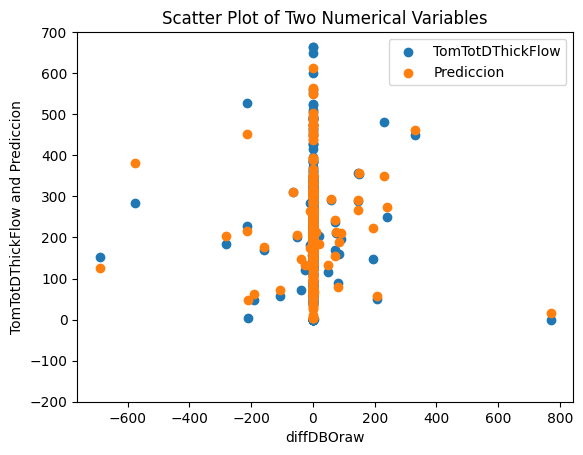

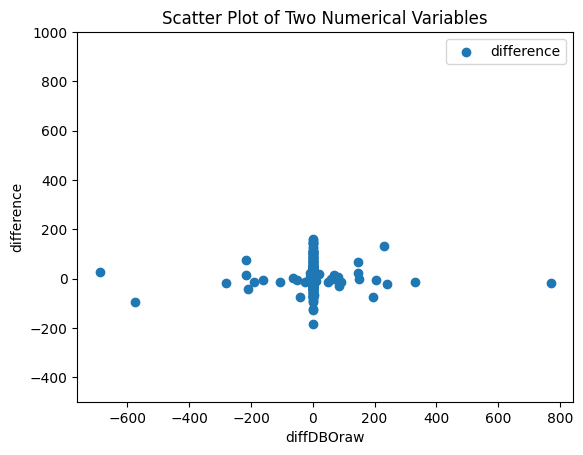

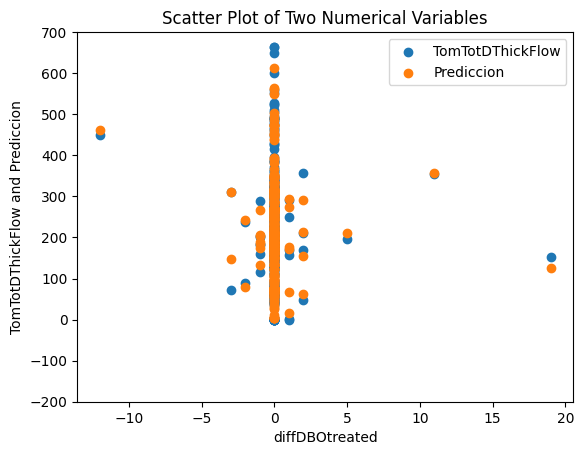

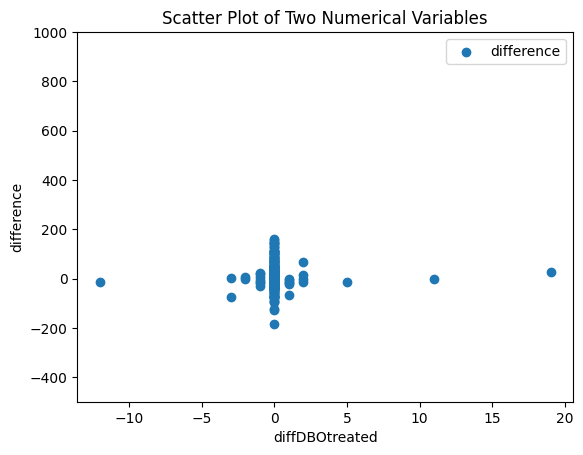

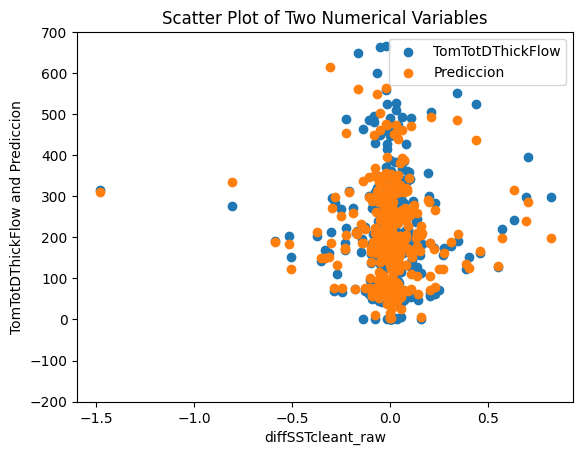

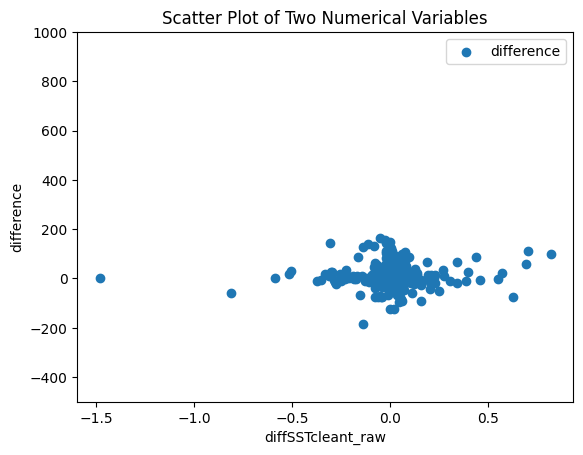

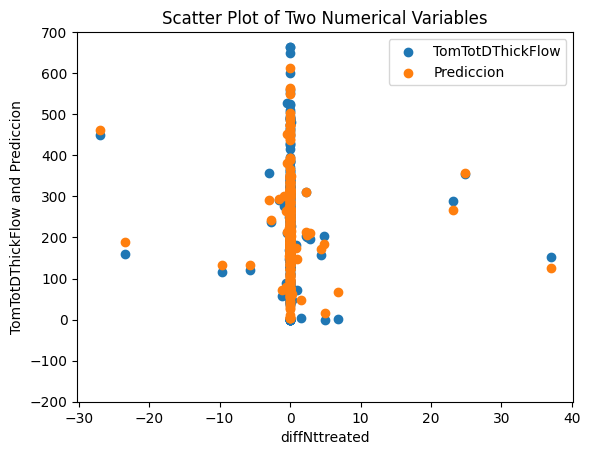

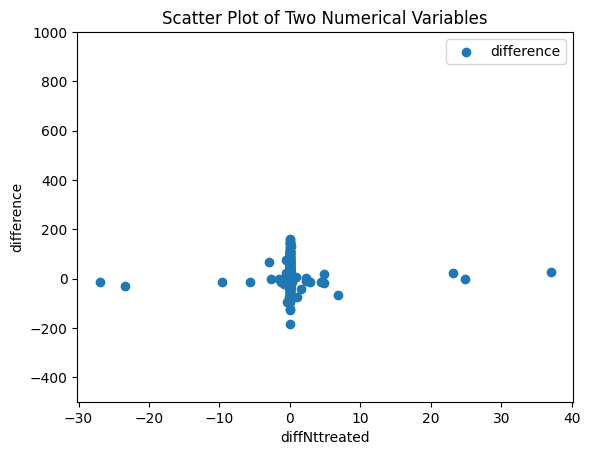

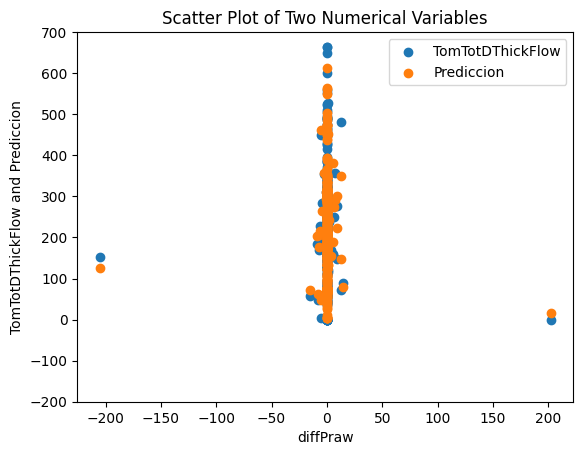

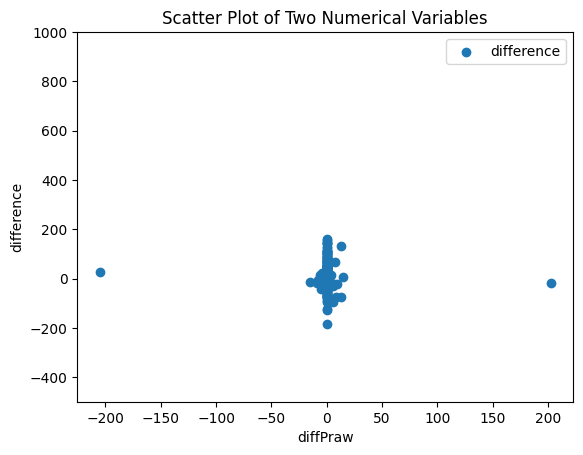

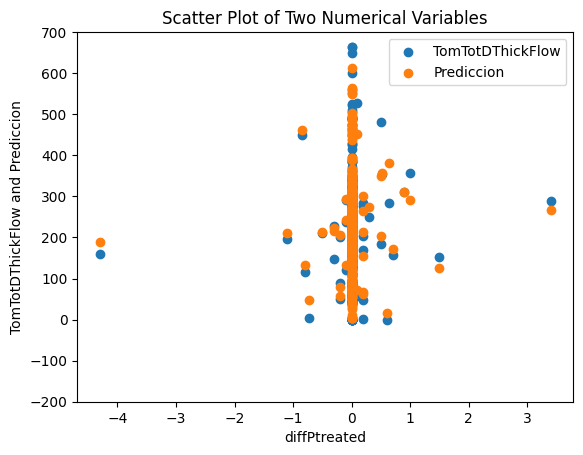

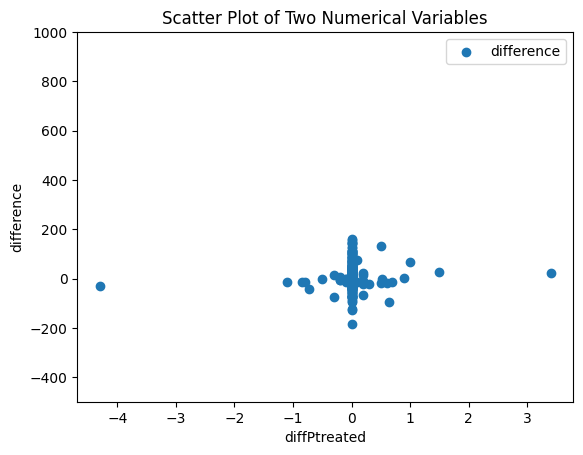

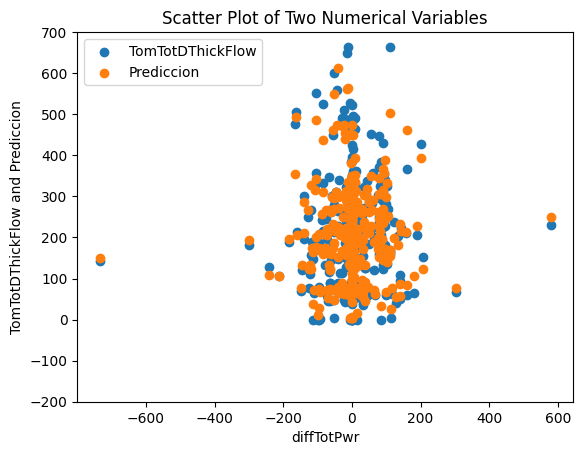

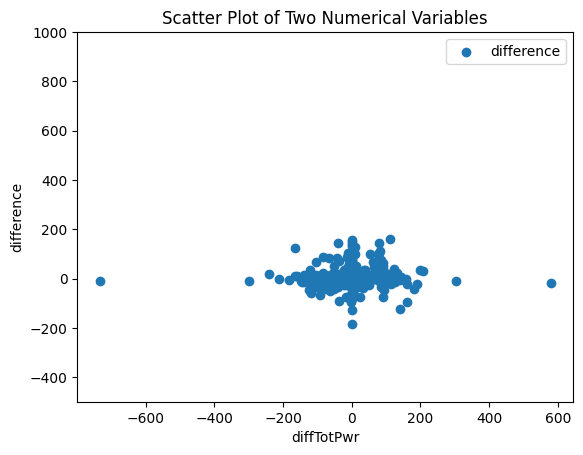

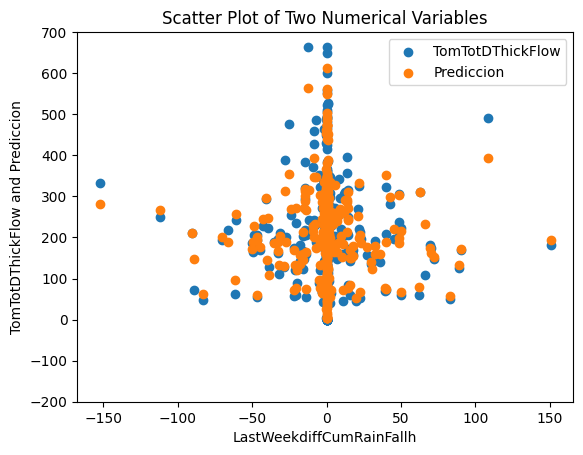

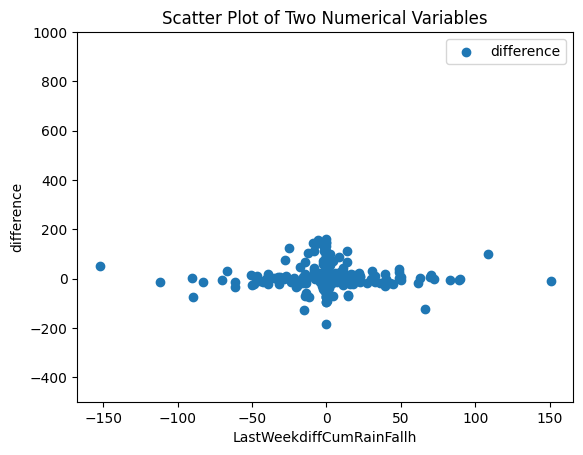

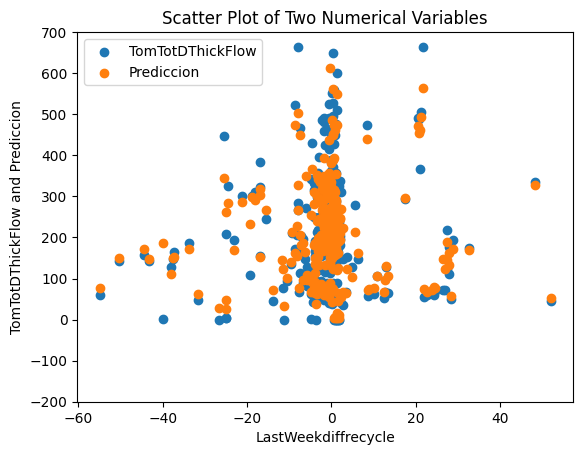

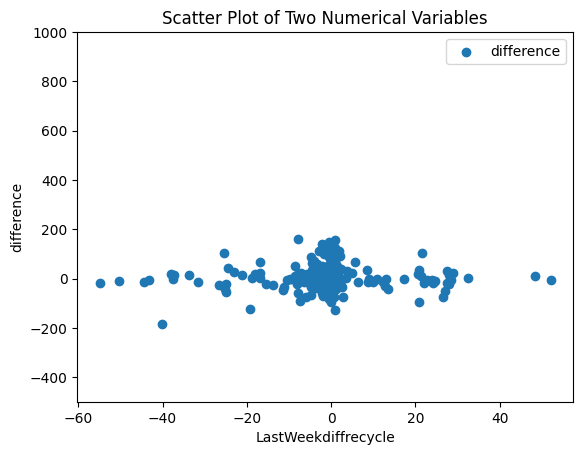

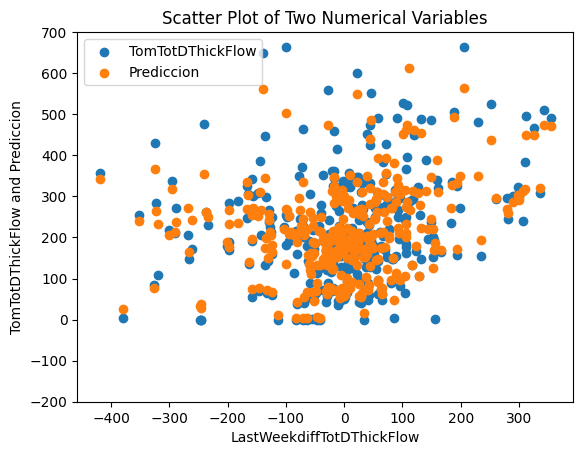

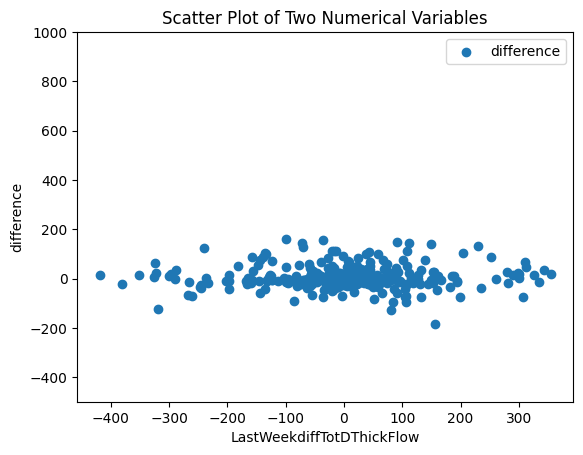

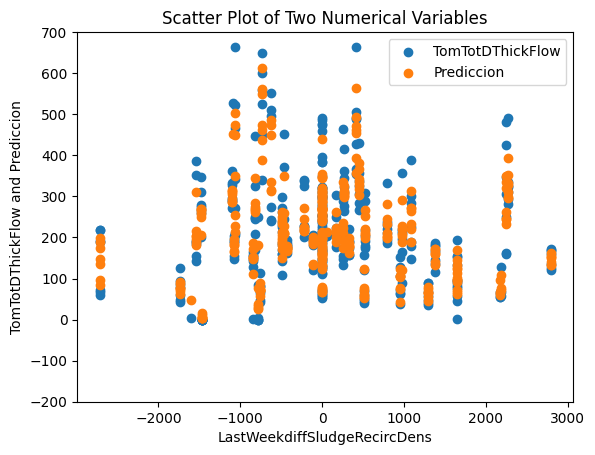

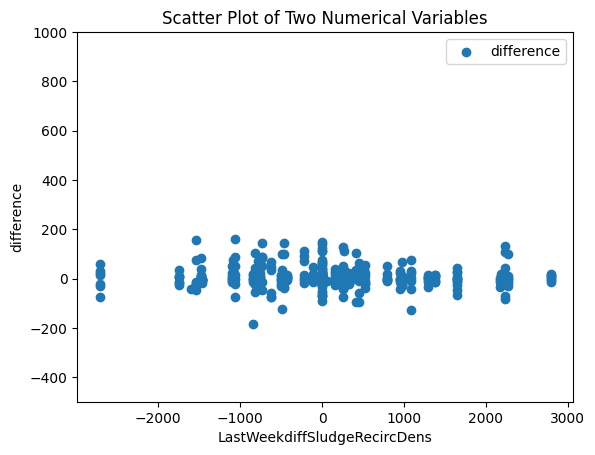

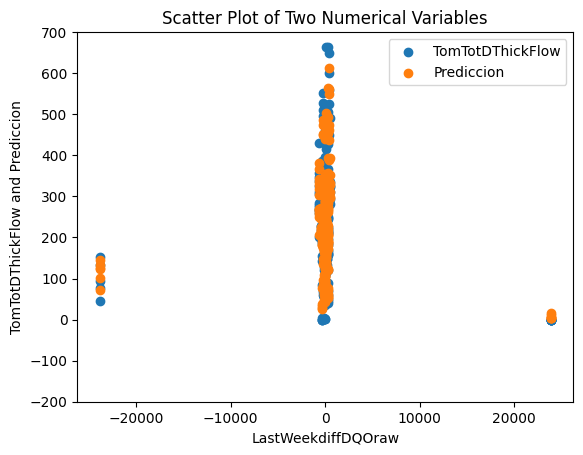

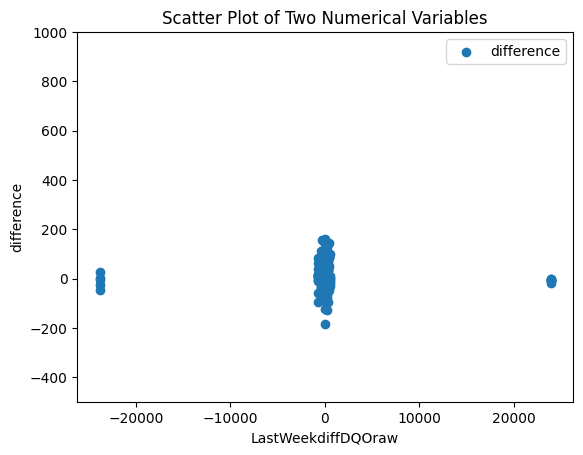

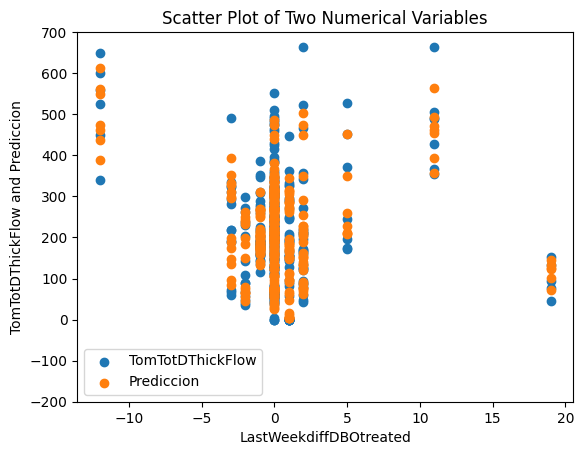

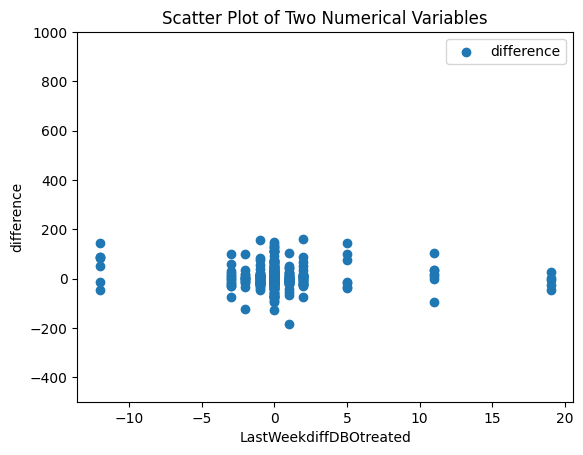

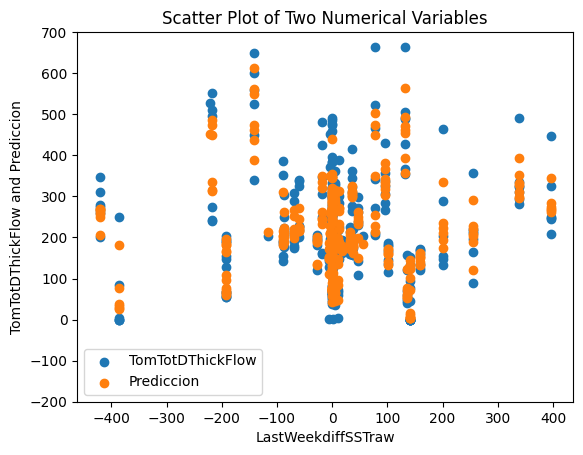

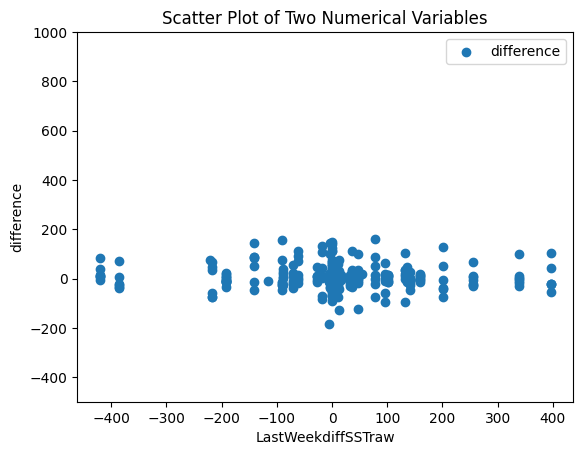

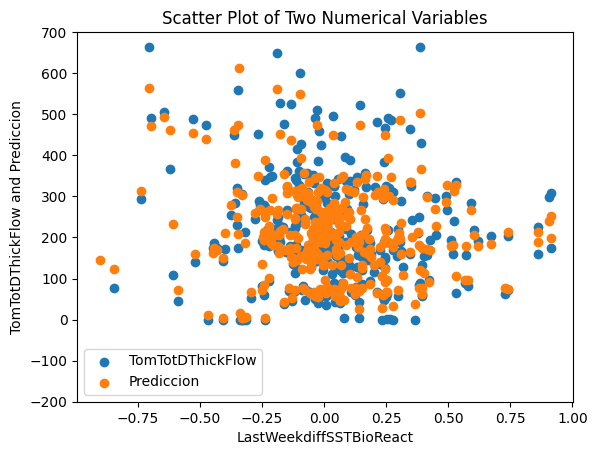

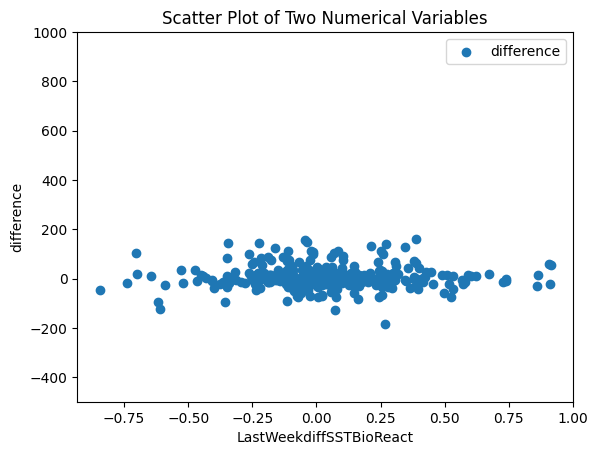

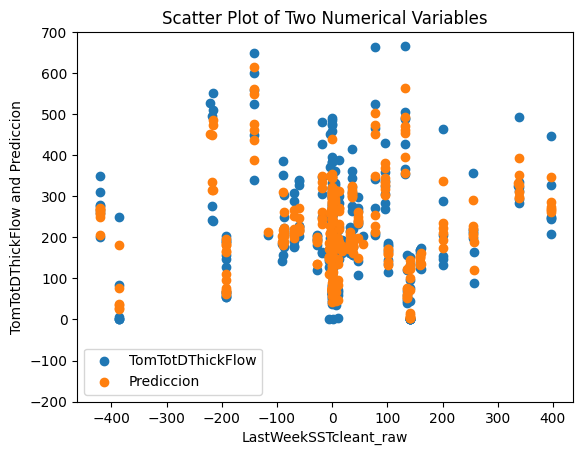

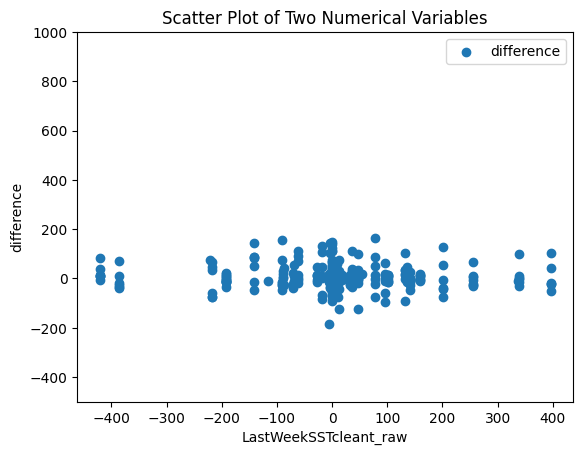

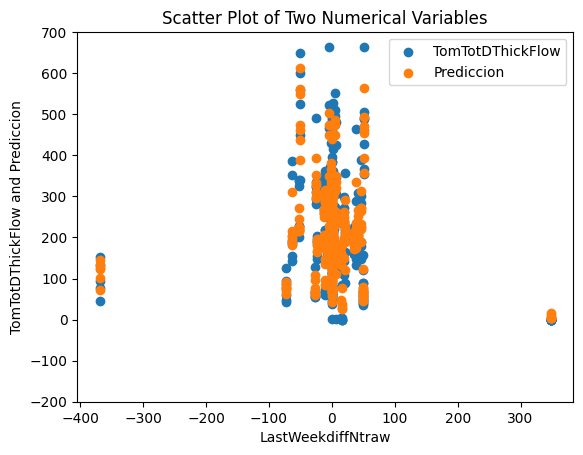

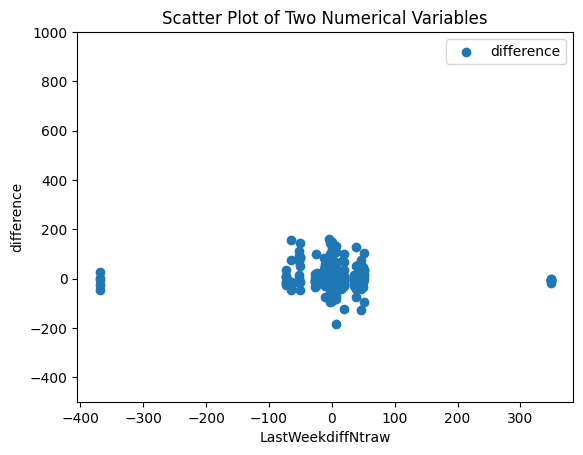

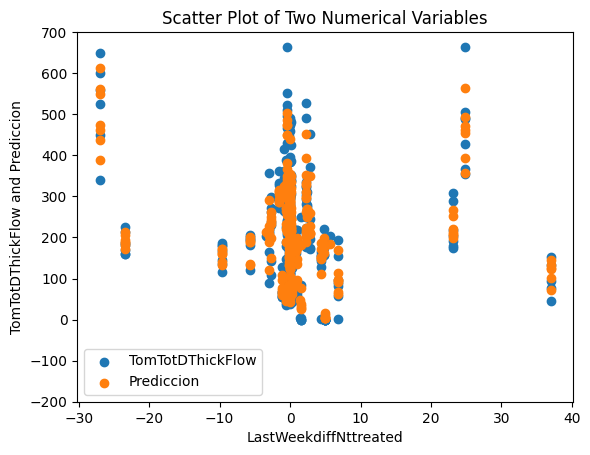

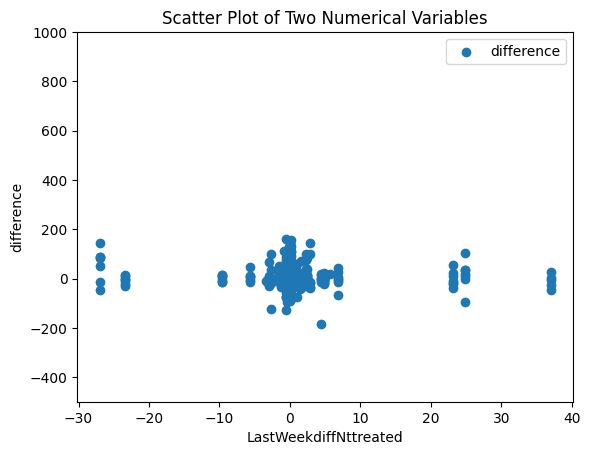

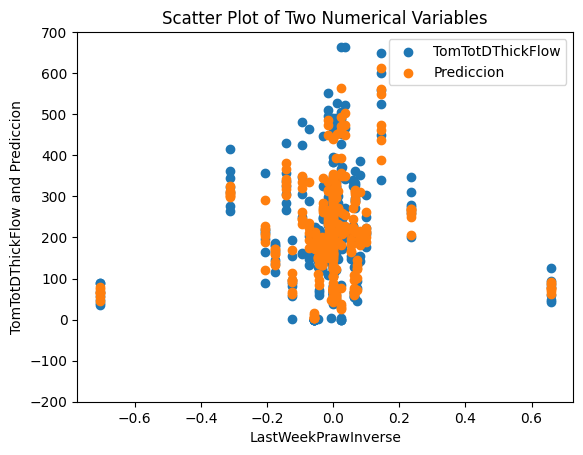

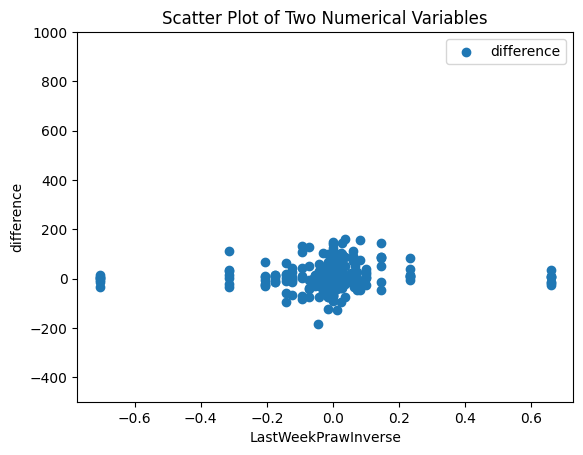

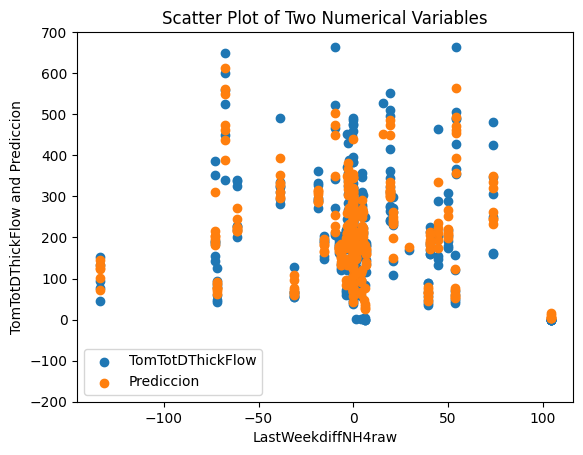

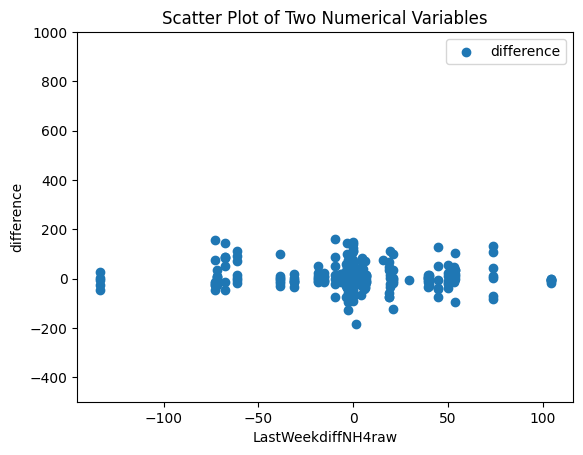

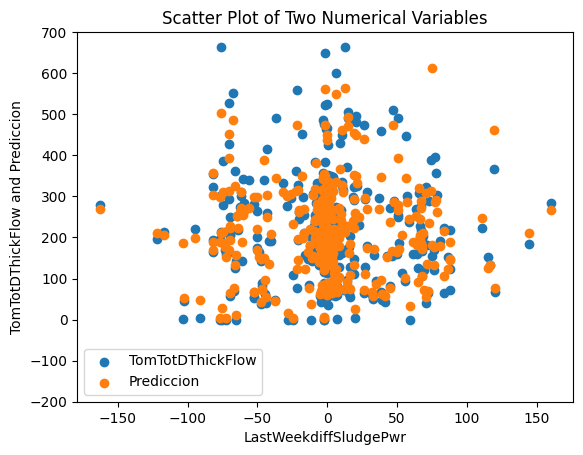

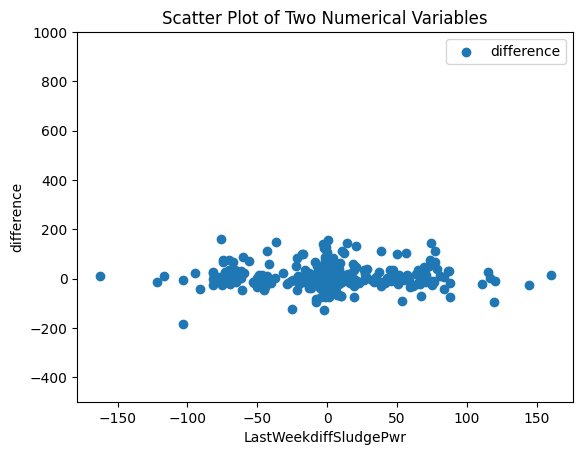

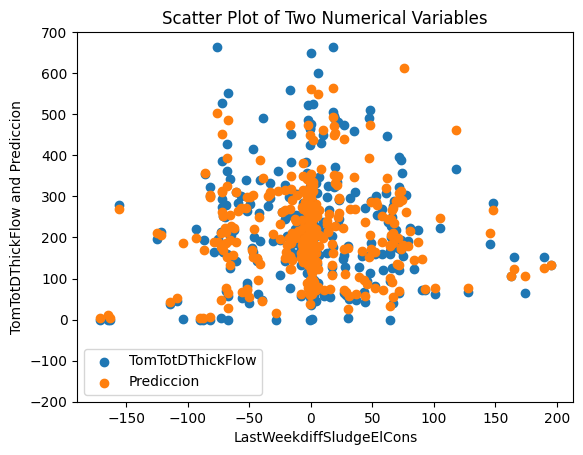

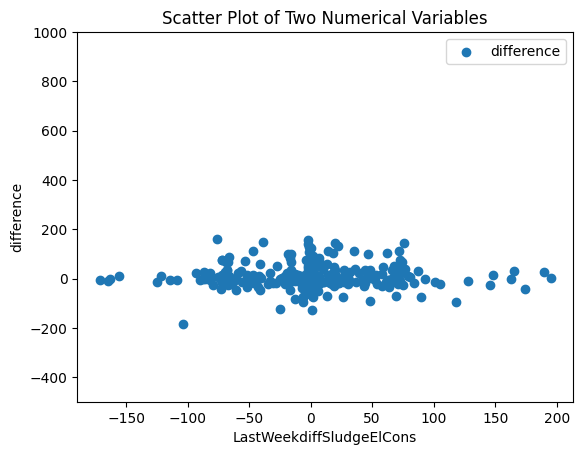

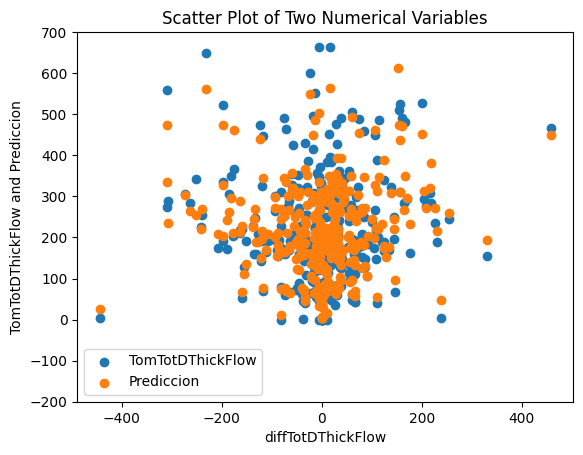

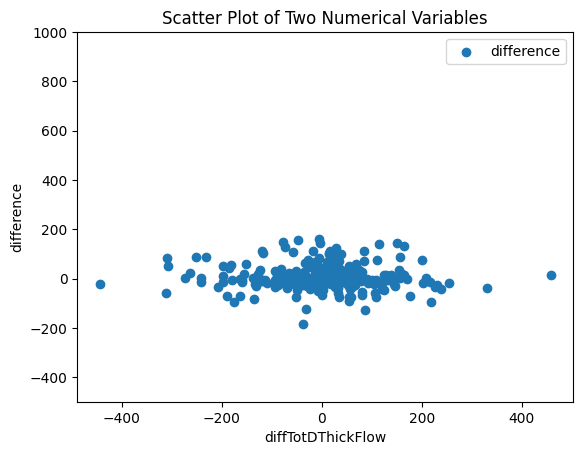

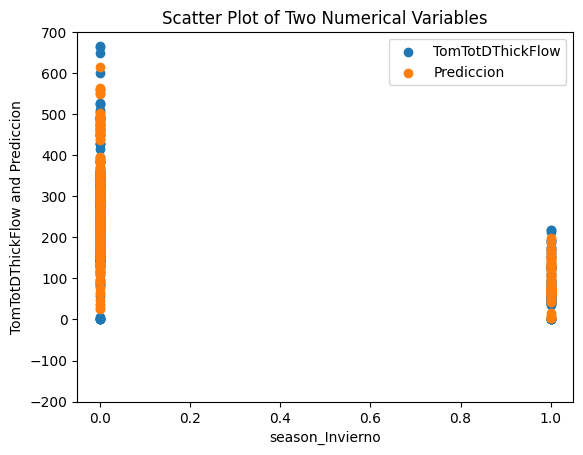

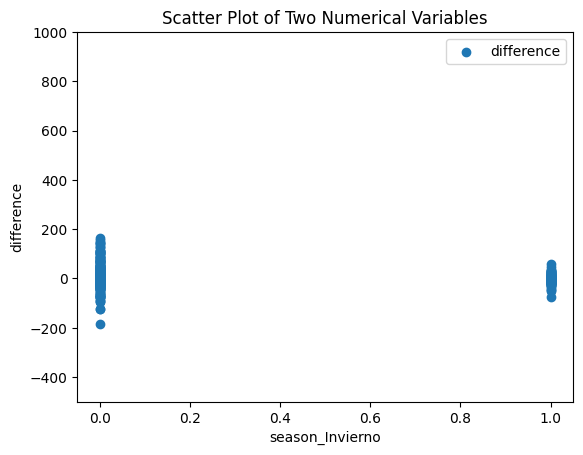

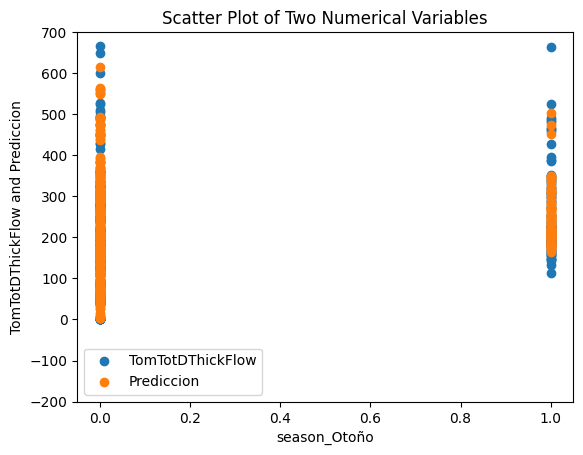

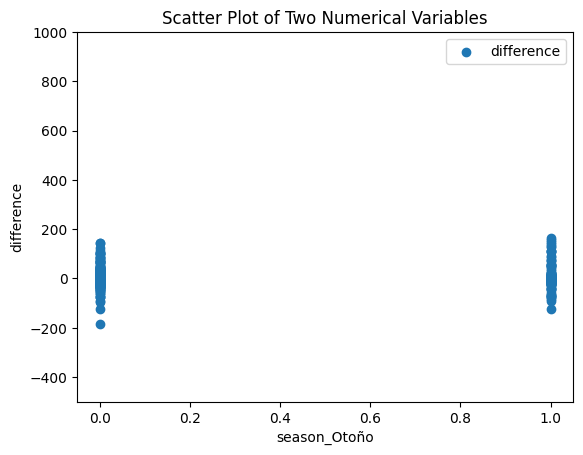

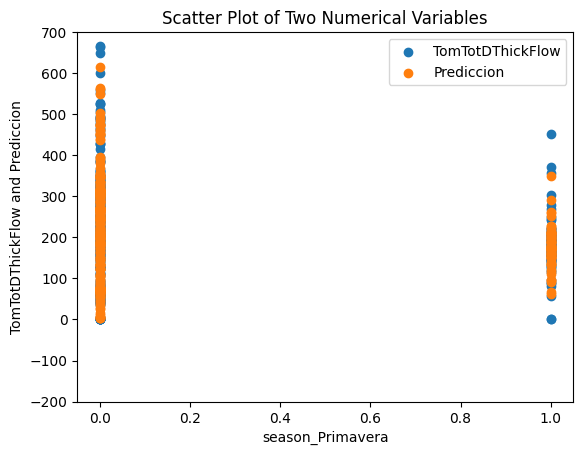

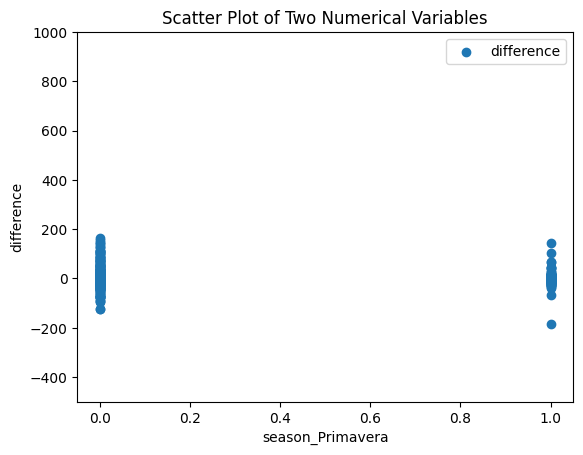

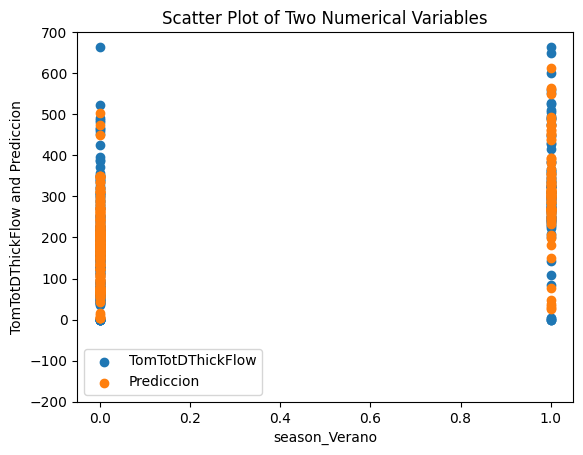

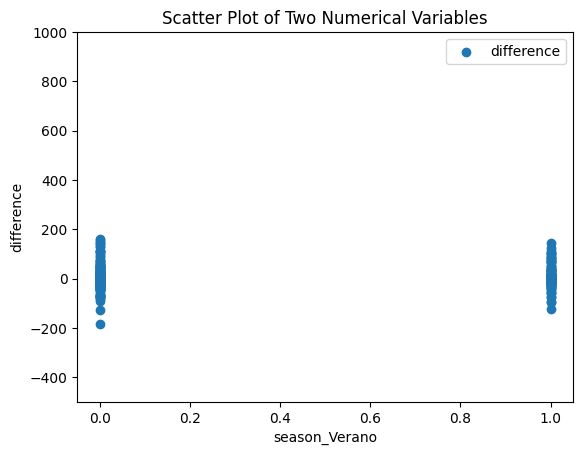

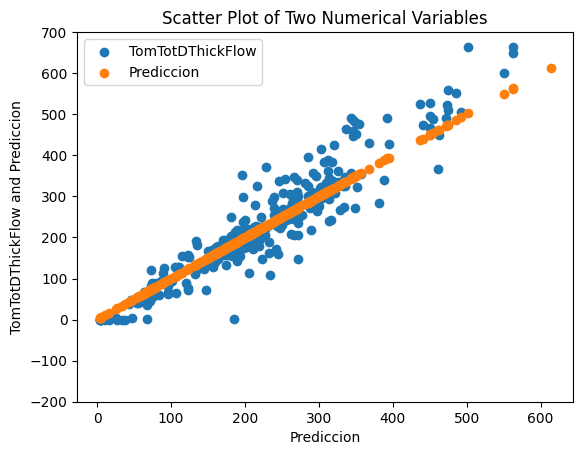

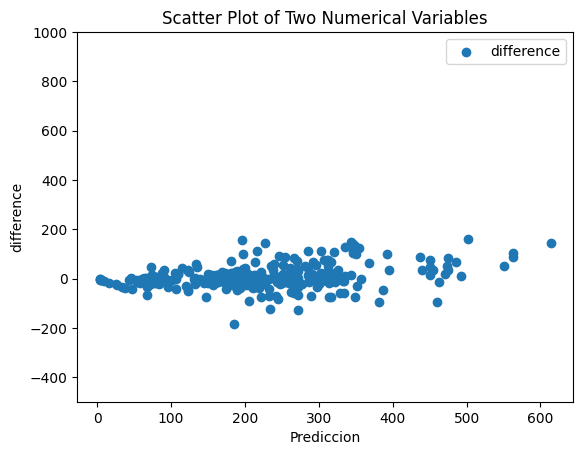

In [3]:
from docx import Document
from io import BytesIO
from docx.shared import Inches

# Set the variable for which you want to create the plot
tempImages = []
variable = "date"
# Create a new figure
plt.figure()

# String plot
plt.plot(data[variable], data["TomTotDThickFlow"], label='TomTotDThickFlow')
plt.plot(data[variable], data["Prediccion"], label='Prediccion')
plt.title('Scatter Plot of Two Numerical Variables')
plt.xlabel(variable)
plt.ylabel('TomTotDThickFlow and Prediccion')
plt.legend()
plt.ylim(bottom=-200, top=700)

# Save the figure to a BytesIO object
image_stream = BytesIO()
plt.savefig(image_stream, format='png')
plt.show()
plt.close()  # Close the figure to free up resources
tempImages.append([image_stream, "date"])

#Create a new figure
plt.figure()

#Scatter plot
plt.scatter(data[variable], data["TomTotDThickFlow"], label='TomTotDThickFlow')
plt.scatter(data[variable], data["Prediccion"], label='Prediccion')
plt.title('Scatter Plot of Two Numerical Variables')
plt.xlabel(variable)
plt.ylabel('TomTotDThickFlow and Prediccion')
plt.legend()
plt.ylim(bottom=-200, top=700)

#Save the figure to a BytesIO Object
image_stream2 = BytesIO()
plt.savefig(image_stream2, format='png')
plt.show()
plt.close()  # Close the figure to free up resources
tempImages.append([image_stream2, "date"])

################################################################################

#set varibale for wich you want to make a plot
more_variables = ["SSTtreatedInverse", "CumRainFallh", "CetrifugeFlow", "TotDThickFlow", "SettlerSludgeLevel", "SludgeReactDens", "SludgeRecircDens", "DQOraw", "DQOtreated", "DBOraw", "DBOtreated", "SSTraw", "SSTBioReact", "SSTcleant_raw", "Ntraw", "Nttreated", "Praw", "PrawInverse", "NH4raw", "NH4treated", "DBOrawWaterDens", "WaterPwr", "SludgePwr", "diffIBioReactInverse", "diffCumRainFallh", "diffSludgeRecircDens", "diffDQOraw", "diffDBOraw", "diffDBOtreated", "diffSSTcleant_raw", "diffNttreated", "diffPraw", "diffPtreated", "diffTotPwr", "LastWeekdiffCumRainFallh", "LastWeekdiffrecycle", "LastWeekdiffTotDThickFlow", "LastWeekdiffSludgeRecircDens", "LastWeekdiffDQOraw", "LastWeekdiffDBOtreated", "LastWeekdiffSSTraw", "LastWeekdiffSSTBioReact", "LastWeekSSTcleant_raw", "LastWeekdiffNtraw", "LastWeekdiffNttreated", "LastWeekPrawInverse", "LastWeekdiffNH4raw", "LastWeekdiffSludgePwr", "LastWeekdiffSludgeElCons", "diffTotDThickFlow", "season_Invierno", "season_Otoño", "season_Primavera", "season_Verano", "Prediccion"]

#making a loop to go through every variable/data in csv-file to make plots/graphs
for variable in more_variables:
    plt.figure()
    plt.scatter(data[variable], data["TomTotDThickFlow"], label='TomTotDThickFlow')
    plt.scatter(data[variable], data["Prediccion"], label='Prediccion')
    plt.title('Scatter Plot of Two Numerical Variables')
    plt.xlabel(variable)
    plt.ylabel('TomTotDThickFlow and Prediccion')
    plt.legend()
    plt.ylim(bottom=-200, top=700)
    temp = BytesIO()
    plt.savefig(temp, format='png')
    plt.show()
    plt.close()  # Close the figure to free up resources
    plt.figure()
    plt.scatter(data[variable], data["difference"], label='difference')
    plt.title('Scatter Plot of Two Numerical Variables')
    plt.xlabel(variable)
    plt.ylabel('difference')
    plt.legend()
    plt.ylim(bottom=-500, top=1000)
    temp2 = BytesIO()
    plt.savefig(temp2, format='png')
    plt.show()
    plt.close()  # Close the figure to free up resources
    tempImages.append([temp, "Scatter " + variable])
    tempImages.append([temp2, "Scatter " + variable])

#Save the figure to a BytesIO Object
#############################################################

# Create a Word document
doc = Document()

# Add the image to the Word document
doc.add_picture("images/header.jpg", width=Inches(6))
doc.add_heading("Graphs and Values", 0)

#making a table to display all graphs/plots
table = doc.add_table(rows=len(more_variables)+1, cols=2)

#inserting graphs/plots into the table in the word document
for i, row in enumerate(table.rows):
    for j, cell in enumerate(row.cells):
        # Get the corresponding image path dynamically
        image_path = tempImages[i * len(row.cells) + j]
        cell_paragraph = cell.add_paragraph()
        cell_paragraph.add_run('\n').add_text(image_path[1]).bold = True
        cell_paragraph.add_run().add_picture(image_path[0], width=Inches(3))


# Save the Word document
doc.save('scatter_plot1.docx')